In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

#define the mean average percentage error (MAPE), as this will be our error metric.

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# for SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [ ]:
import yfinance as yf


ticker_symbol = "JPY=X"

# Define the desired date range for the historical data
start_date = "2018-06-28"
end_date = "2023-06-28"

# Download the historical data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2018-06-28  110.228996  110.411003  109.973999  110.214996  110.214996       0
2018-06-29  110.442001  110.871002  110.388000  110.486000  110.486000       0
2018-07-02  110.745003  111.053001  110.606003  110.709999  110.709999       0
2018-07-03  110.887001  111.125999  110.510002  110.871002  110.871002       0
2018-07-04  110.400002  110.545998  110.281998  110.407997  110.407997       0
...                ...         ...         ...         ...         ...     ...
2023-06-21  141.335007  142.328995  141.371002  141.335007  141.335007       0
2023-06-22  141.688004  142.934006  141.626007  141.688004  141.688004       0
2023-06-23  143.029999  143.854004  142.761993  143.029999  143.029999       0
2023-06-26  143.541000  143.682007  142.973007  143.541000  14

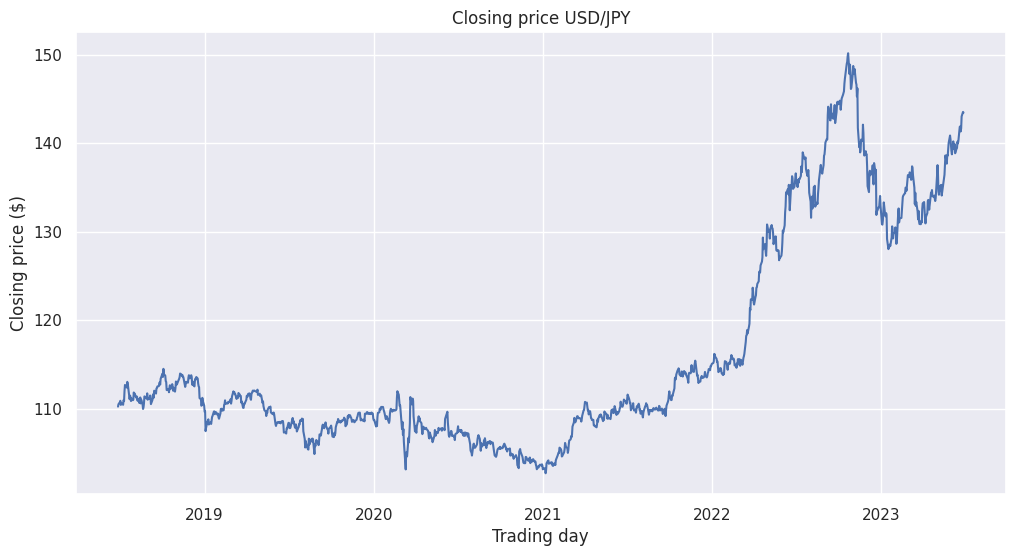

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close)
plt.title('Closing price USD/JPY')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show()

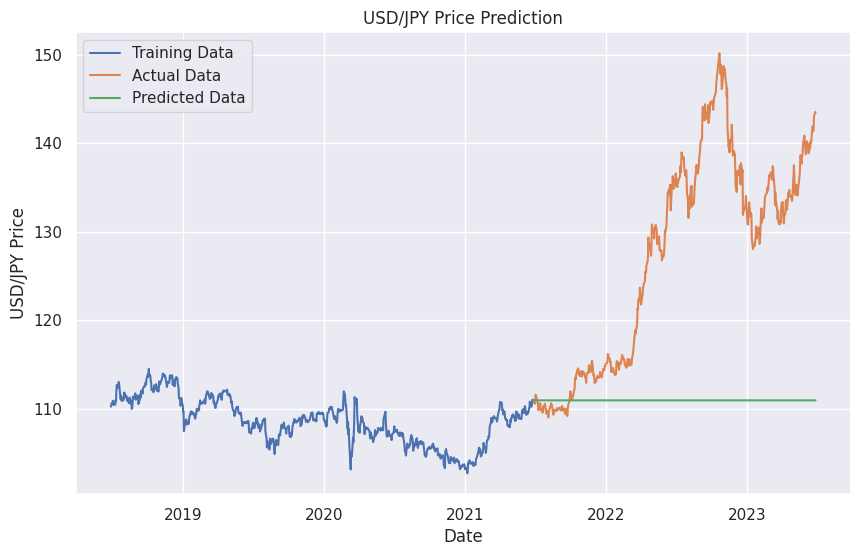

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert the date index to datetime
data.index = pd.to_datetime(data.index)

# Select the relevant column containing the USD/JPY price
usd_jpy = data['Close']

# Split the data into training and testing sets
train = usd_jpy['2018-06-28':'2021-06-27']
test = usd_jpy['2021-06-28':'2023-06-28']

# Create and fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

prediction_index = test.index.tolist()

# Predict the USD/JPY prices
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Visualize the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, predictions, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('USD/JPY Price')
plt.title('USD/JPY Price Prediction')
plt.legend()
plt.show()

To enhance the model by considering seasonality, performing model diagnostics, and optimizing the parameters, we can use the SARIMA (Seasonal ARIMA) model. SARIMA incorporates both the non-seasonal and seasonal components to capture the underlying patterns in the data.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:                        SARIMAX   Log Likelihood               -4769.192
Date:                Wed, 28 Jun 2023   AIC                           9540.383
Time:                        23:10:11   BIC                           9545.044
Sample:                             0   HQIC                          9542.175
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.179e+04   1.77e+04      0.666      0.505   -2.29e+04    4.65e+04
Ljung-Box (L1) (Q):                 758.40   Jarque-Bera (JB):                15.04
Prob(Q):                              0.00   Pr

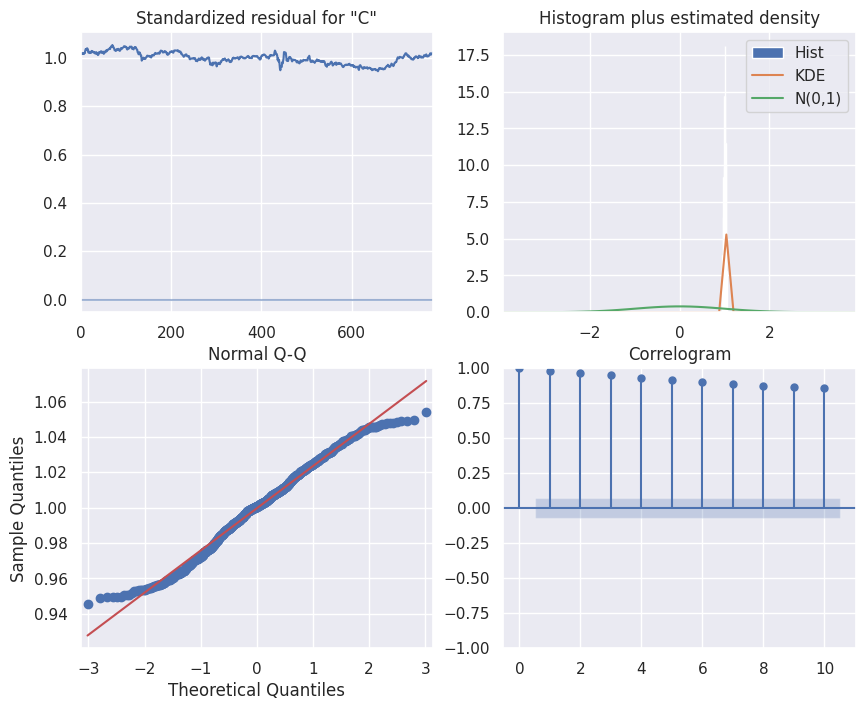

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  781
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood               -4260.943
Date:                    Wed, 28 Jun 2023   AIC                           8525.886
Time:                            23:10:15   BIC                           8535.207
Sample:                                 0   HQIC                          8529.471
                                    - 781                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.9990      1.330      0.751      0.453      -1.608       3.606
sigma2      3011.4386   3471.358      0.868      0.386   -3792.299    9815.176
Ljung-Box (L1) (Q): 

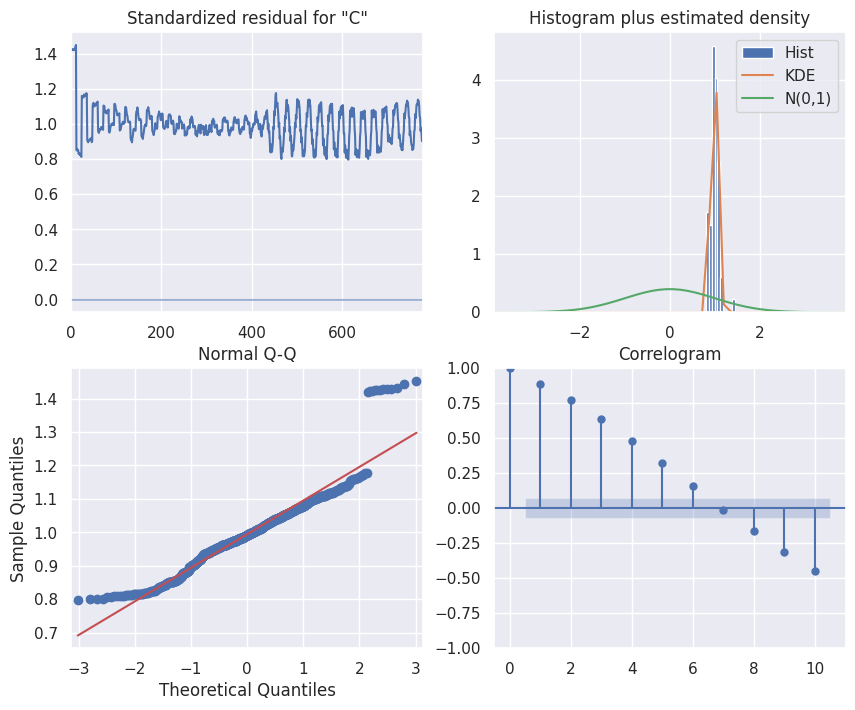

                                SARIMAX Results                                 
Dep. Variable:                    Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood               -1363.755
Date:                  Wed, 28 Jun 2023   AIC                           2729.511
Time:                          23:10:18   BIC                           2734.156
Sample:                               0   HQIC                          2731.298
                                  - 781                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.0318      0.053     38.231      0.000       1.928       2.136
Ljung-Box (L1) (Q):                 609.76   Jarque-Bera (JB):              1037.48
Prob(Q):                       

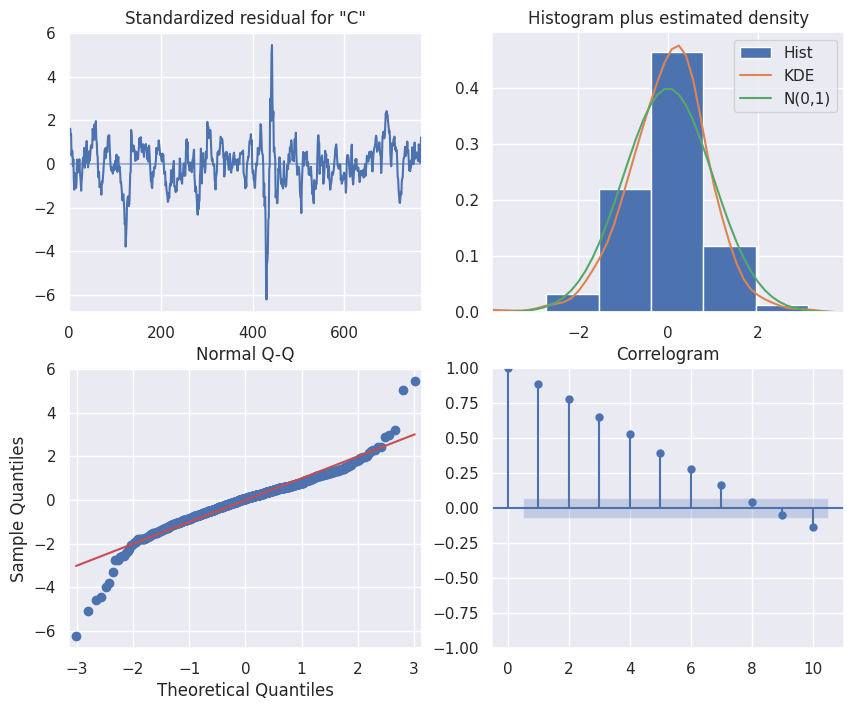

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  781
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood               -1334.804
Date:                    Wed, 28 Jun 2023   AIC                           2673.608
Time:                            23:10:20   BIC                           2682.898
Sample:                                 0   HQIC                          2677.184
                                    - 781                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.2725      0.025    -10.787      0.000      -0.322      -0.223
sigma2         1.8822      0.060     31.600      0.000       1.765       1.999
Ljung-Box (L1) (Q): 

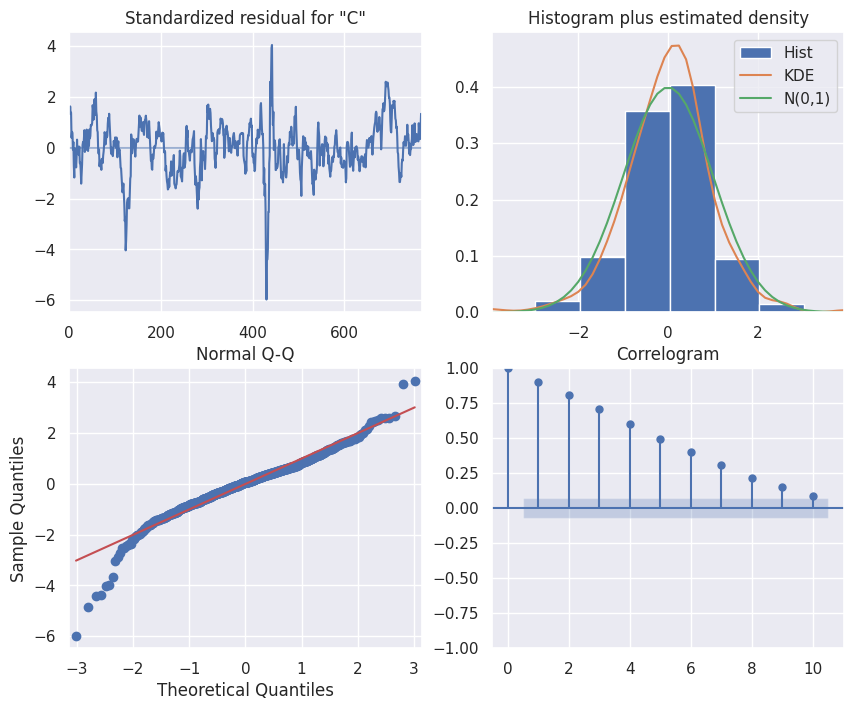

                                SARIMAX Results                                 
Dep. Variable:                    Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood               -1439.464
Date:                  Wed, 28 Jun 2023   AIC                           2882.929
Time:                          23:10:24   BIC                           2892.250
Sample:                               0   HQIC                          2886.513
                                  - 781                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9998   9.05e-05    1.1e+04      0.000       1.000       1.000
sigma2         2.0679      0.055     37.629      0.000       1.960       2.176
Ljung-Box (L1) (Q):                 

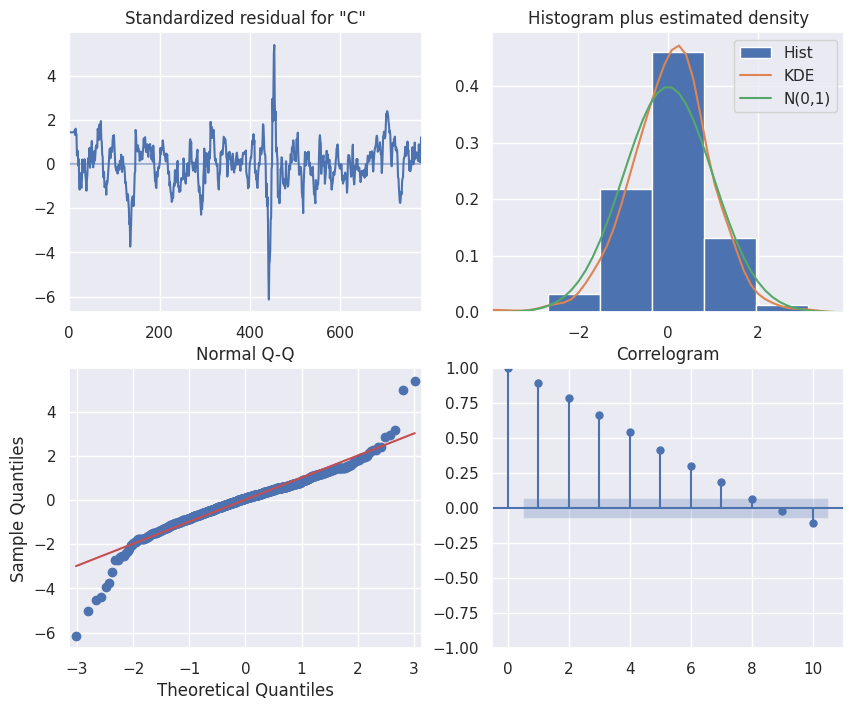

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  781
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood               -1416.225
Date:                    Wed, 28 Jun 2023   AIC                           2838.450
Time:                            23:10:28   BIC                           2852.432
Sample:                                 0   HQIC                          2843.827
                                    - 781                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9998   4.58e-05   2.18e+04      0.000       1.000       1.000
ma.S.L12      -0.2269      0.025     -9.067      0.000      -0.276      -0.178
sigma2         1.958

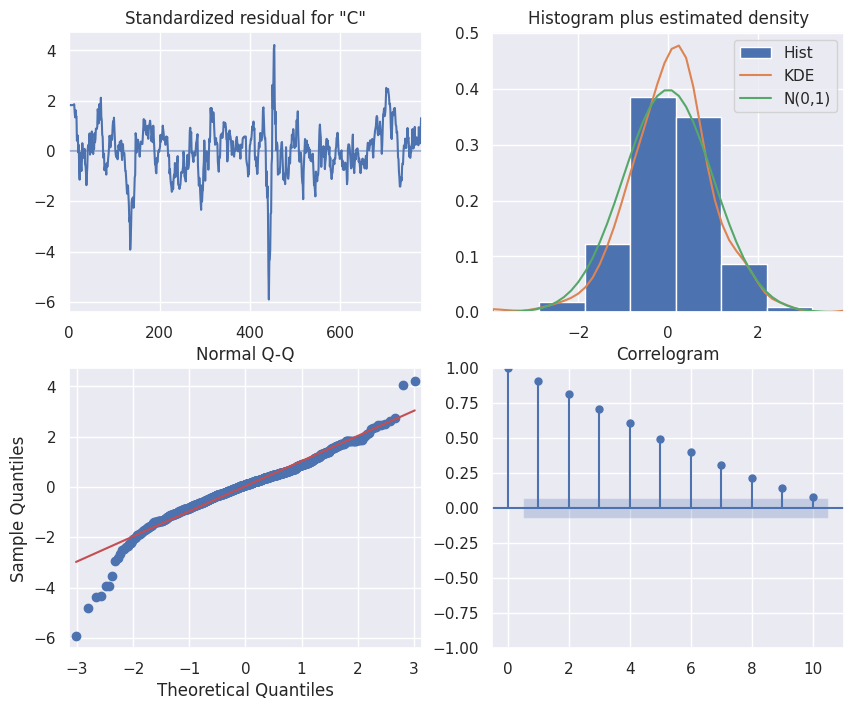

                                SARIMAX Results                                 
Dep. Variable:                    Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood               -1334.607
Date:                  Wed, 28 Jun 2023   AIC                           2673.214
Time:                          23:10:30   BIC                           2682.504
Sample:                               0   HQIC                          2676.789
                                  - 781                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2712      0.024    -11.159      0.000      -0.319      -0.224
sigma2         1.8813      0.060     31.096      0.000       1.763       2.000
Ljung-Box (L1) (Q):                 

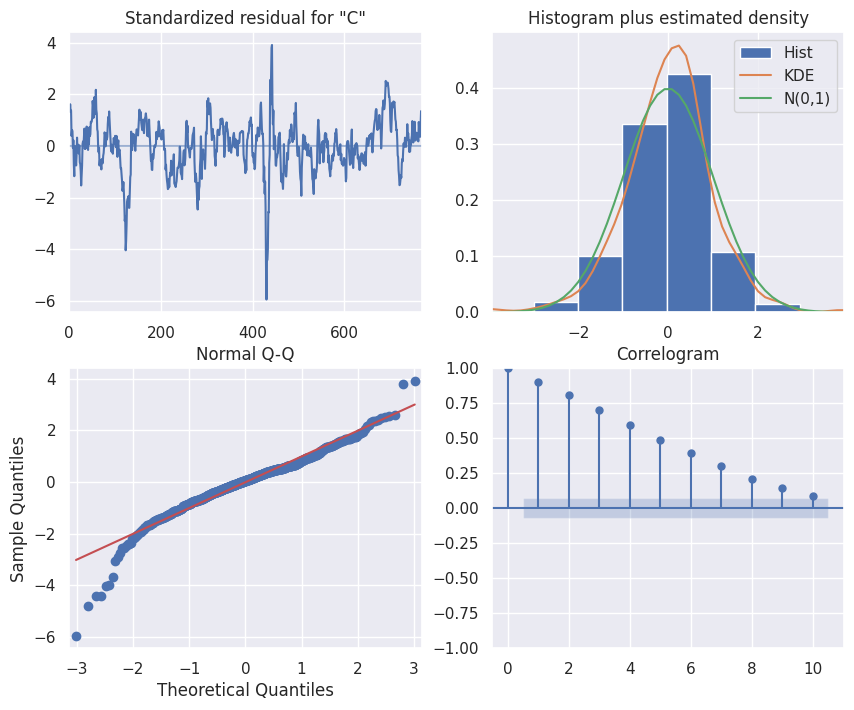

                                 SARIMAX Results                                  
Dep. Variable:                      Close   No. Observations:                  781
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood               -1334.289
Date:                    Wed, 28 Jun 2023   AIC                           2674.578
Time:                            23:10:31   BIC                           2688.513
Sample:                                 0   HQIC                          2679.941
                                    - 781                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1547      0.143     -1.083      0.279      -0.435       0.125
ma.S.L12      -0.1253      0.148     -0.850      0.396      -0.414       0.164
sigma2         1.879

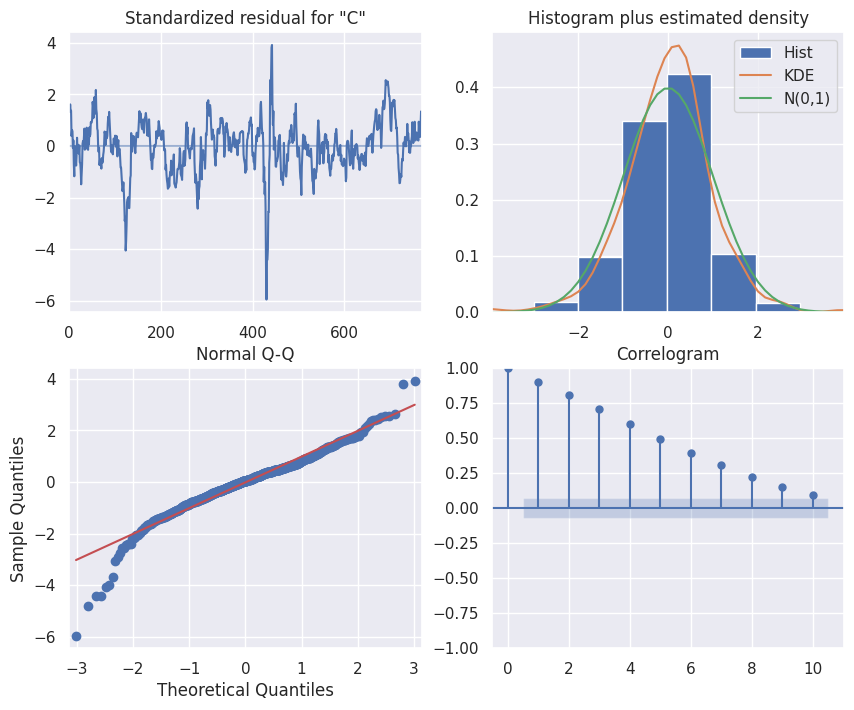

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -4232.034
Date:                Wed, 28 Jun 2023   AIC                           8468.068
Time:                        23:10:32   BIC                           8477.389
Sample:                             0   HQIC                          8471.652
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9992      0.063     15.815      0.000       0.875       1.123
sigma2      2957.3130   2487.073      1.189      0.234   -1917.261    7831.887
Ljung-Box (L1) (Q):                  49.80   Jarque-

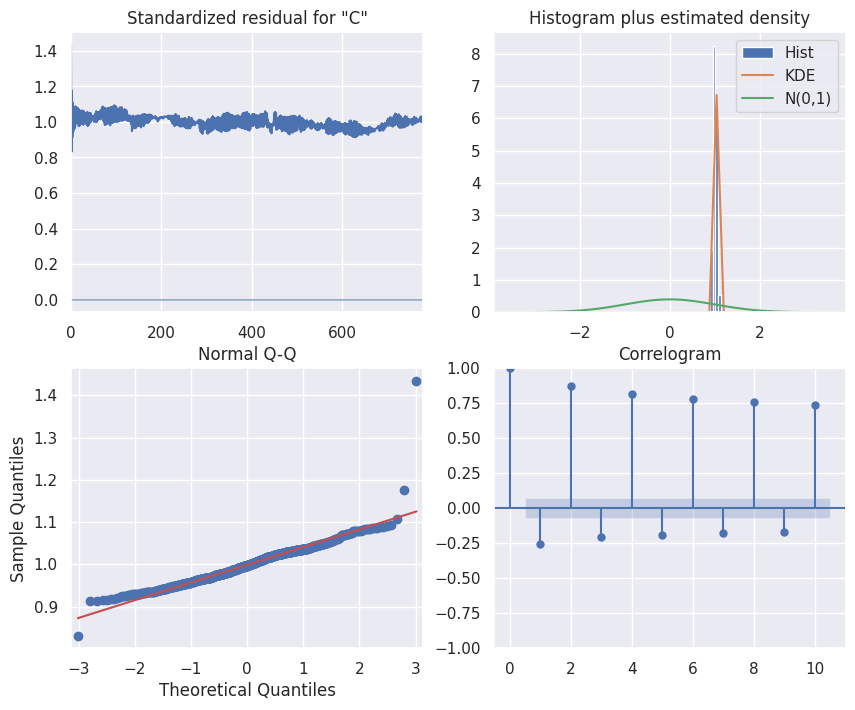

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood               -3724.381
Date:                            Wed, 28 Jun 2023   AIC                           7454.762
Time:                                    23:10:35   BIC                           7468.744
Sample:                                         0   HQIC                          7460.139
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9999      0.303      3.295      0.001       0.405       1.595
ma.S.L12       0.9995      2.082   

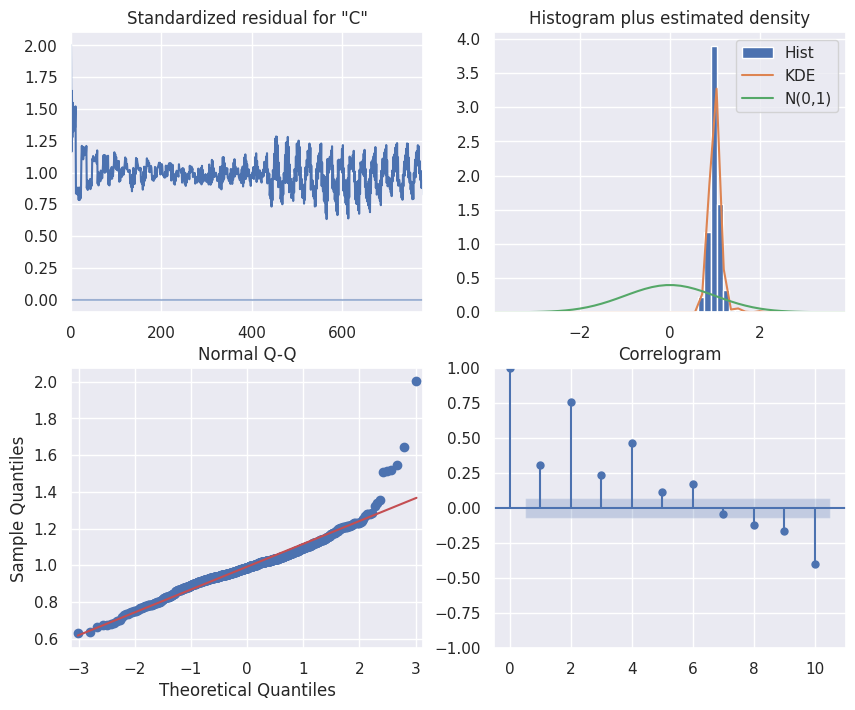

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood               -1057.359
Date:                             Wed, 28 Jun 2023   AIC                           2118.717
Time:                                     23:10:36   BIC                           2128.007
Sample:                                          0   HQIC                          2122.293
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7480      0.013     55.608      0.000       0.722       0.774
sigma2         0.9148      

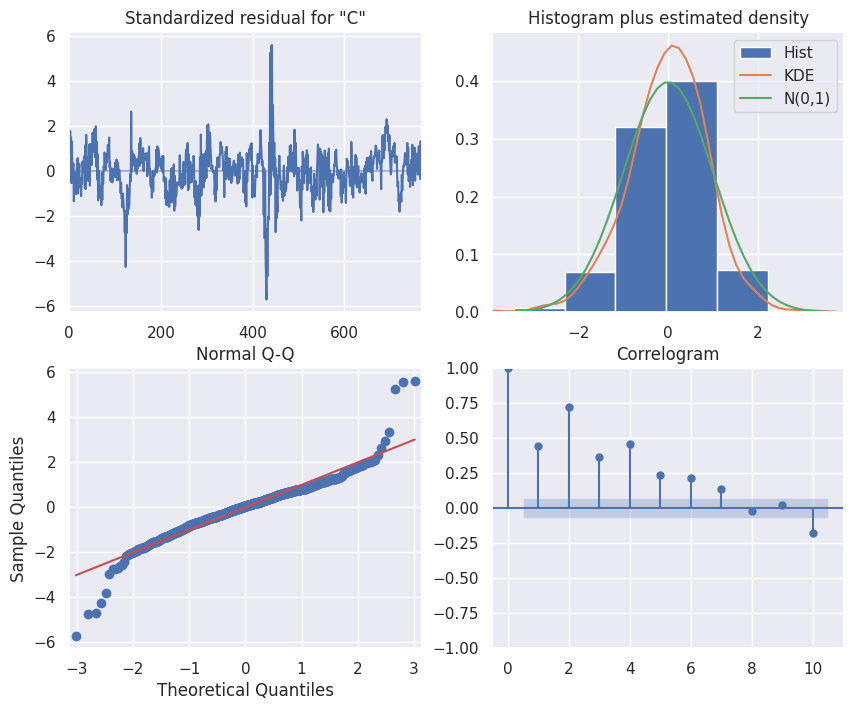

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1008.120
Date:                            Wed, 28 Jun 2023   AIC                           2022.239
Time:                                    23:10:38   BIC                           2036.174
Sample:                                         0   HQIC                          2027.602
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7750      0.016     48.472      0.000       0.744       0.806
ma.S.L12      -0.3728      0.027   

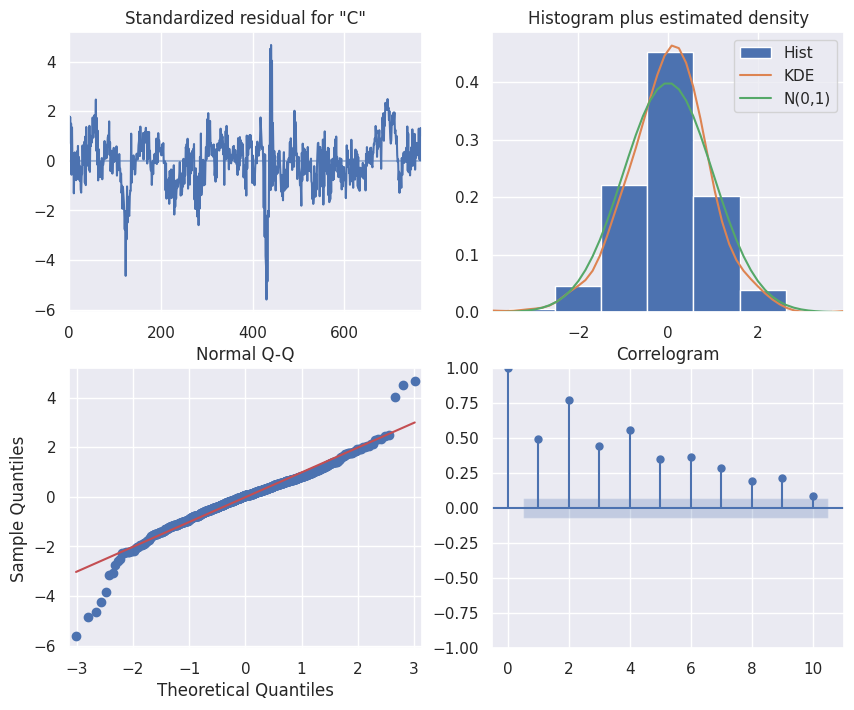

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood               -1125.083
Date:                             Wed, 28 Jun 2023   AIC                           2256.166
Time:                                     23:10:39   BIC                           2270.147
Sample:                                          0   HQIC                          2261.543
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7537      0.013     56.105      0.000       0.727       0.780
ar.S.L12       0.9998      

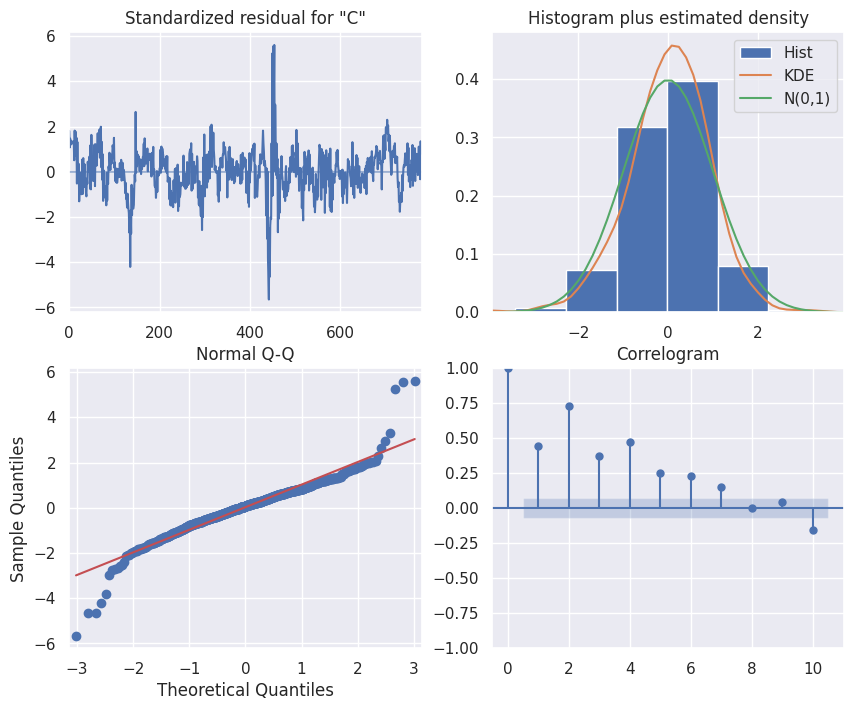

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1200.149
Date:                            Wed, 28 Jun 2023   AIC                           2408.299
Time:                                    23:10:42   BIC                           2426.941
Sample:                                         0   HQIC                          2415.469
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9949      0.002    403.809      0.000       0.990       1.000
ar.S.L12       0.9999   7.21e-05   

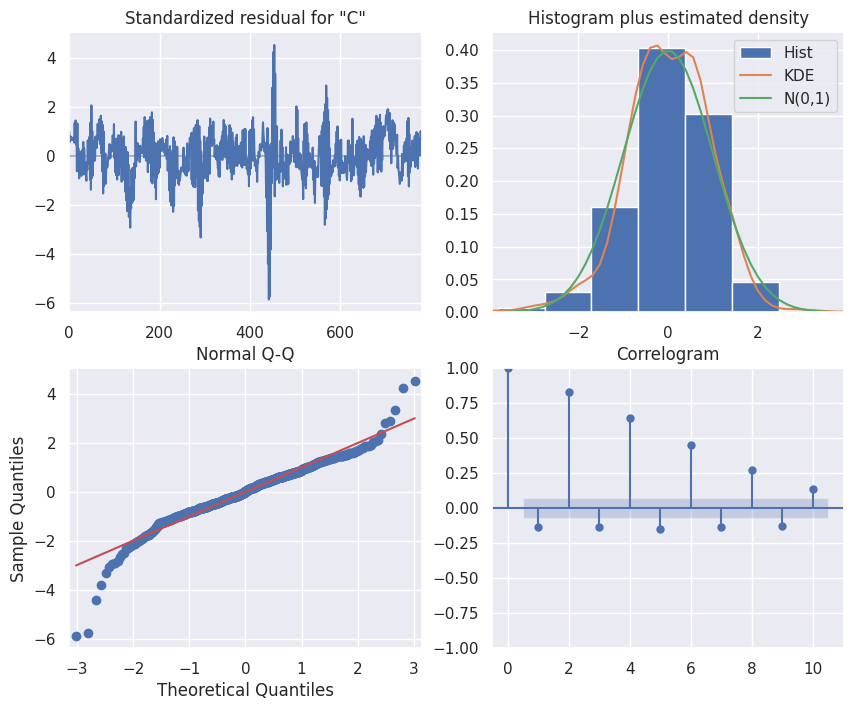

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood               -1013.509
Date:                             Wed, 28 Jun 2023   AIC                           2033.018
Time:                                     23:10:43   BIC                           2046.953
Sample:                                          0   HQIC                          2038.381
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7618      0.016     46.684      0.000       0.730       0.794
ar.S.L12      -0.3306      

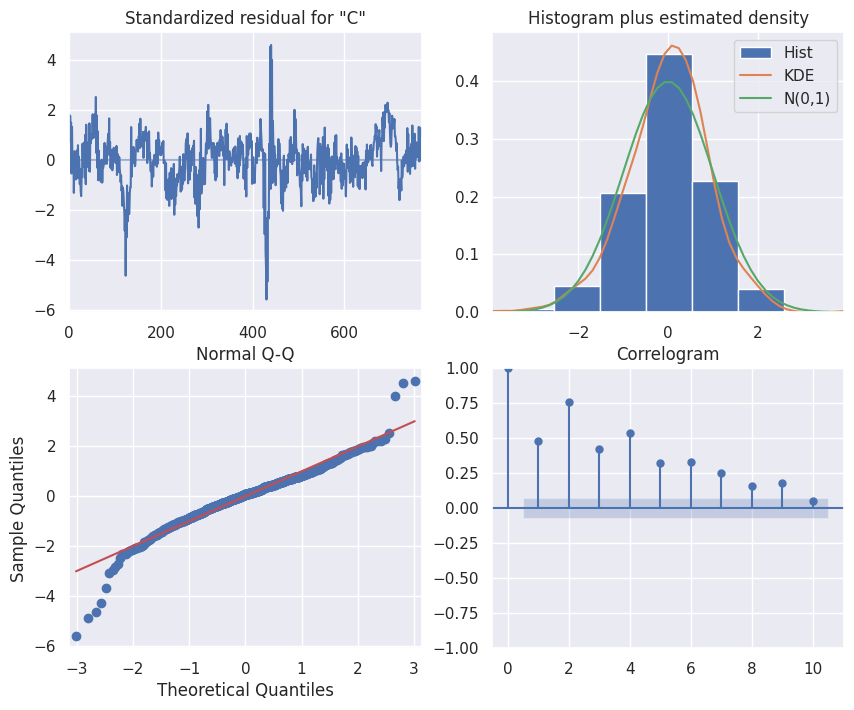

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1008.106
Date:                            Wed, 28 Jun 2023   AIC                           2024.212
Time:                                    23:10:46   BIC                           2042.793
Sample:                                         0   HQIC                          2031.363
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7747      0.016     48.210      0.000       0.743       0.806
ar.S.L12      -0.0171      0.108   

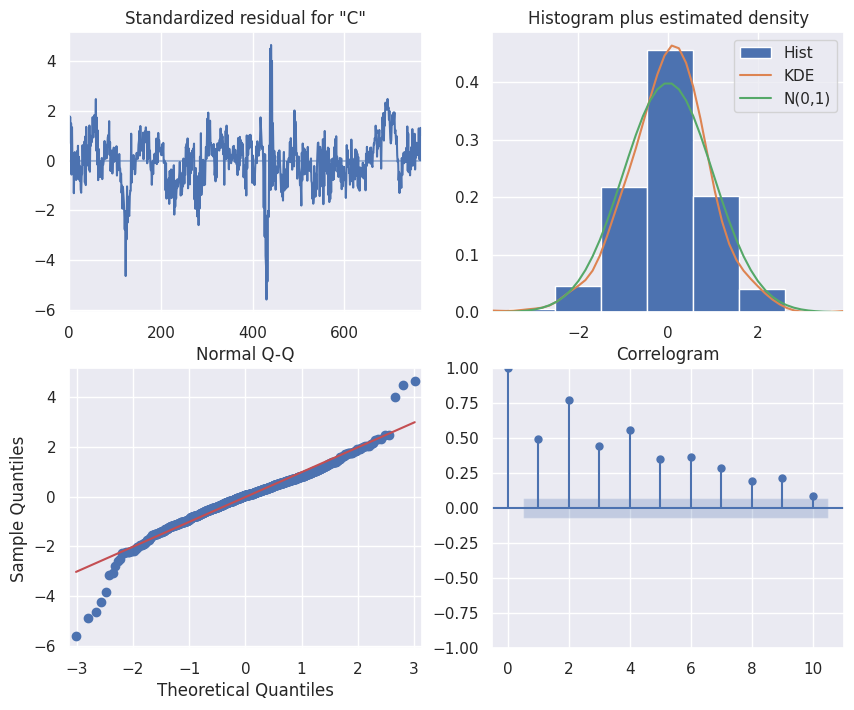

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -499.547
Date:                Wed, 28 Jun 2023   AIC                           1001.095
Time:                        23:10:48   BIC                           1005.754
Sample:                             0   HQIC                          1002.887
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2108      0.006     37.650      0.000       0.200       0.222
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               902.52
Prob(Q):                              0.81   Pr

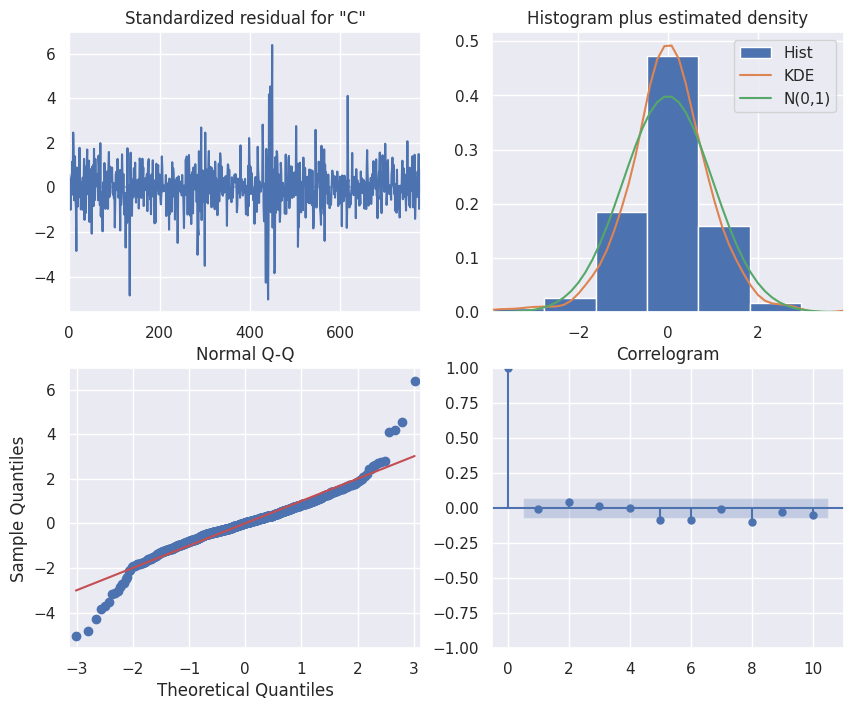

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -498.585
Date:                              Wed, 28 Jun 2023   AIC                           1001.171
Time:                                      23:10:49   BIC                           1010.489
Sample:                                           0   HQIC                          1004.755
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0517      0.027     -1.941      0.052      -0.104       0.000
sigma2         0.21

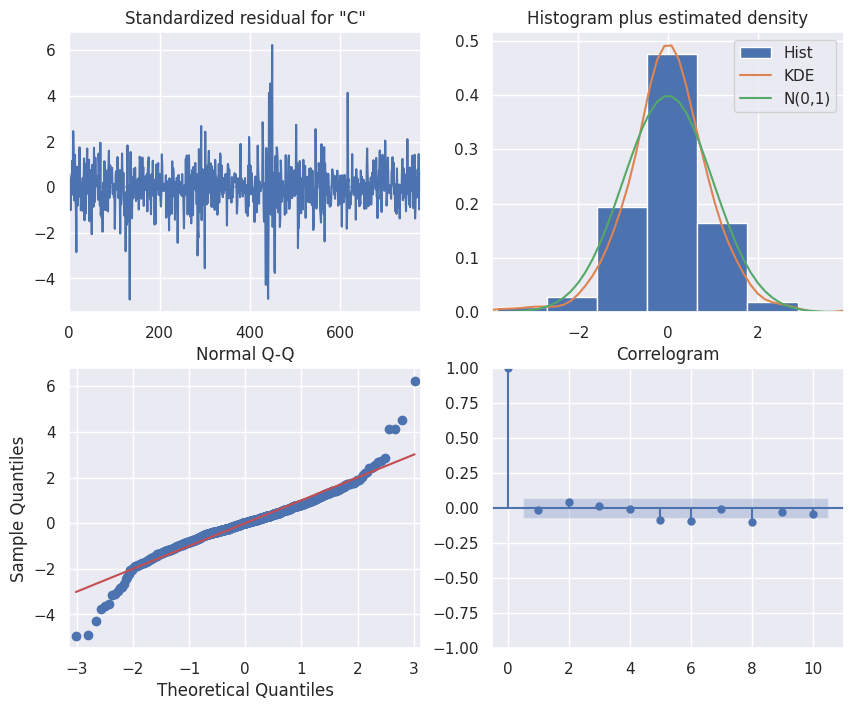

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -777.685
Date:                            Wed, 28 Jun 2023   AIC                           1557.369
Time:                                    23:10:50   BIC                           1562.013
Sample:                                         0   HQIC                          1559.157
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4437      0.011     39.333      0.000       0.422       0.466
Ljung-Box (L1) (Q):                

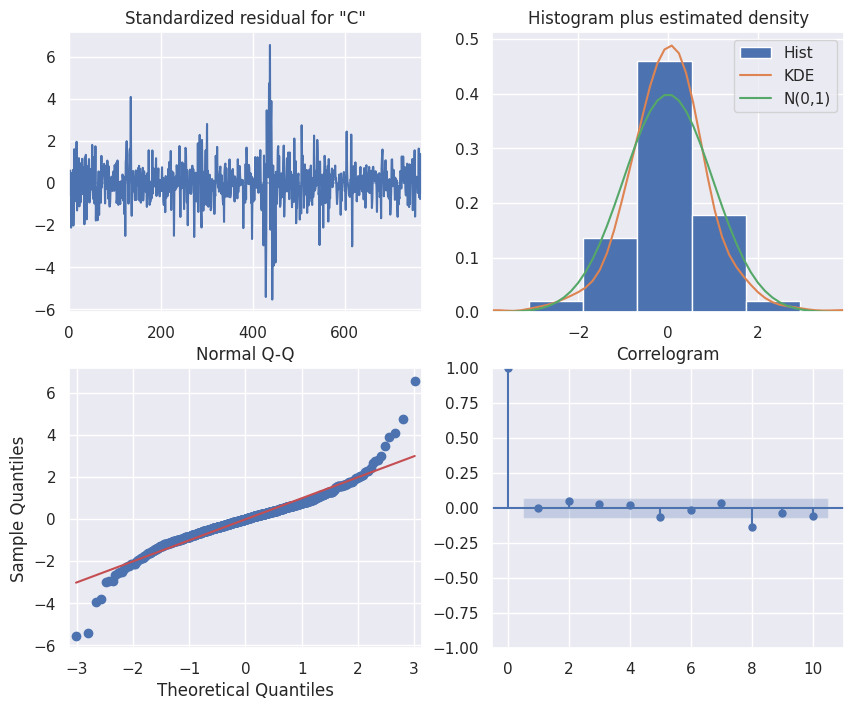

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -517.900
Date:                              Wed, 28 Jun 2023   AIC                           1039.800
Time:                                      23:10:53   BIC                           1049.087
Sample:                                           0   HQIC                          1043.374
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9993      0.978     -1.022      0.307      -2.917       0.918
sigma2         0.21

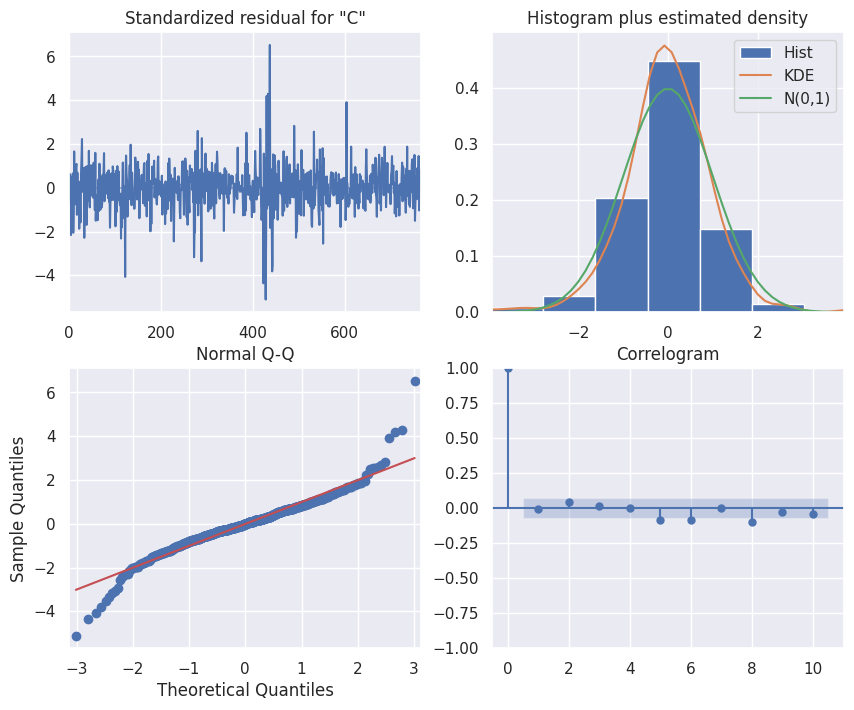

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -498.653
Date:                            Wed, 28 Jun 2023   AIC                           1001.307
Time:                                    23:10:54   BIC                           1010.625
Sample:                                         0   HQIC                          1004.891
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0480      0.027     -1.802      0.072      -0.100       0.004
sigma2         0.2103      0.006   

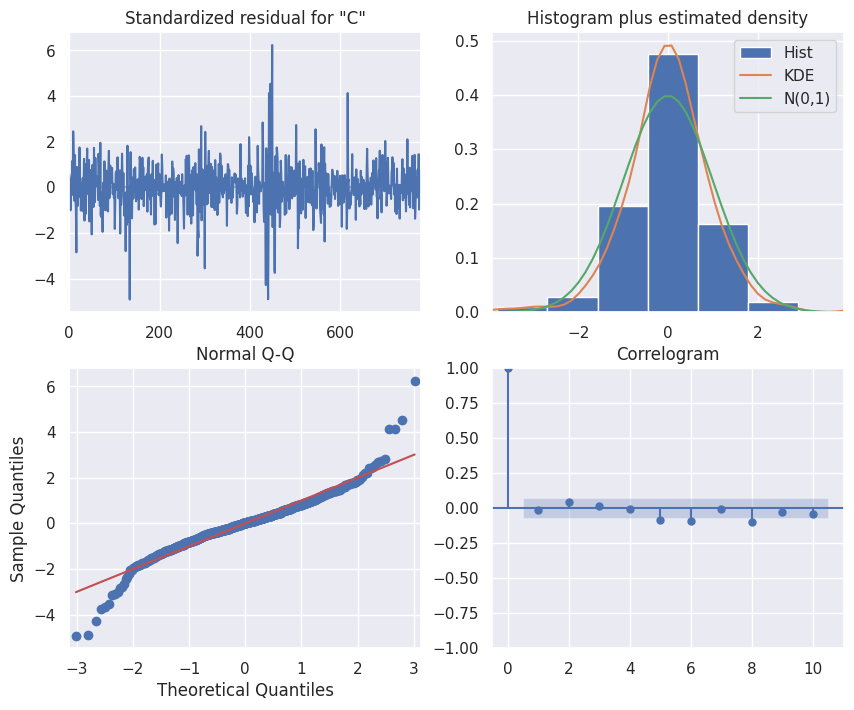

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -498.323
Date:                              Wed, 28 Jun 2023   AIC                           1002.646
Time:                                      23:10:56   BIC                           1016.624
Sample:                                           0   HQIC                          1008.022
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3204      0.613      0.522      0.601      -0.882       1.523
ma.S.L12      -0.37

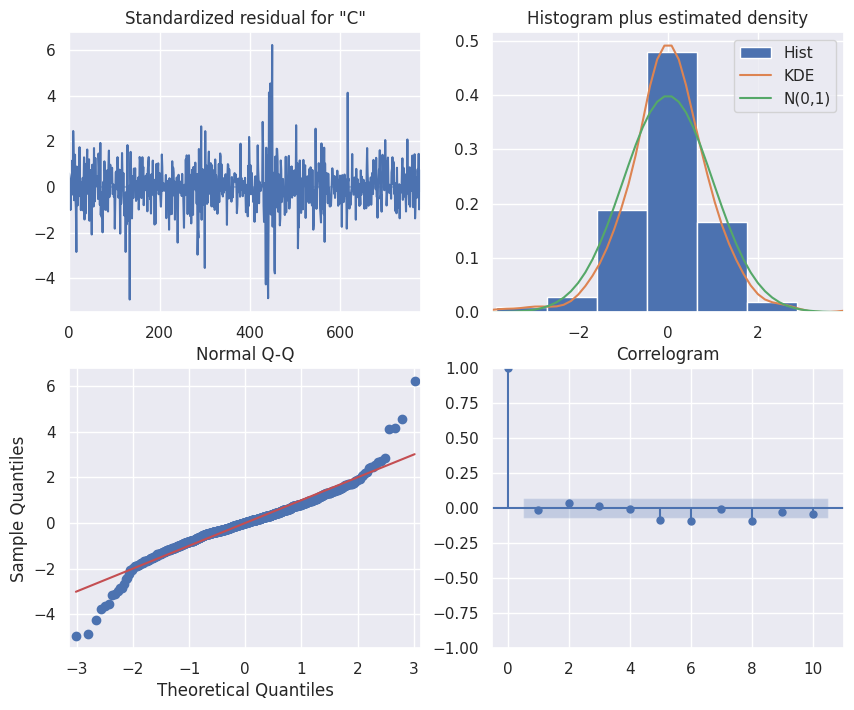

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -665.377
Date:                            Wed, 28 Jun 2023   AIC                           1334.753
Time:                                    23:10:58   BIC                           1344.041
Sample:                                         0   HQIC                          1338.328
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5067      0.023    -22.218      0.000      -0.551      -0.462
sigma2         0.3296      0.011   

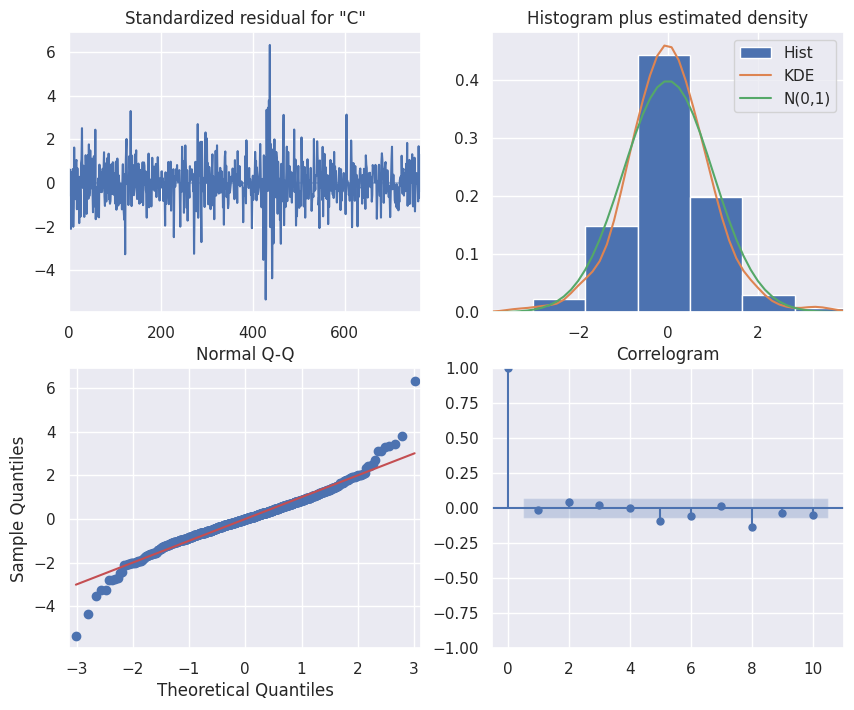

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -517.057
Date:                              Wed, 28 Jun 2023   AIC                           1040.114
Time:                                      23:11:02   BIC                           1054.045
Sample:                                           0   HQIC                          1045.476
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0474      0.030     -1.598      0.110      -0.106       0.011
ma.S.L12      -0.99

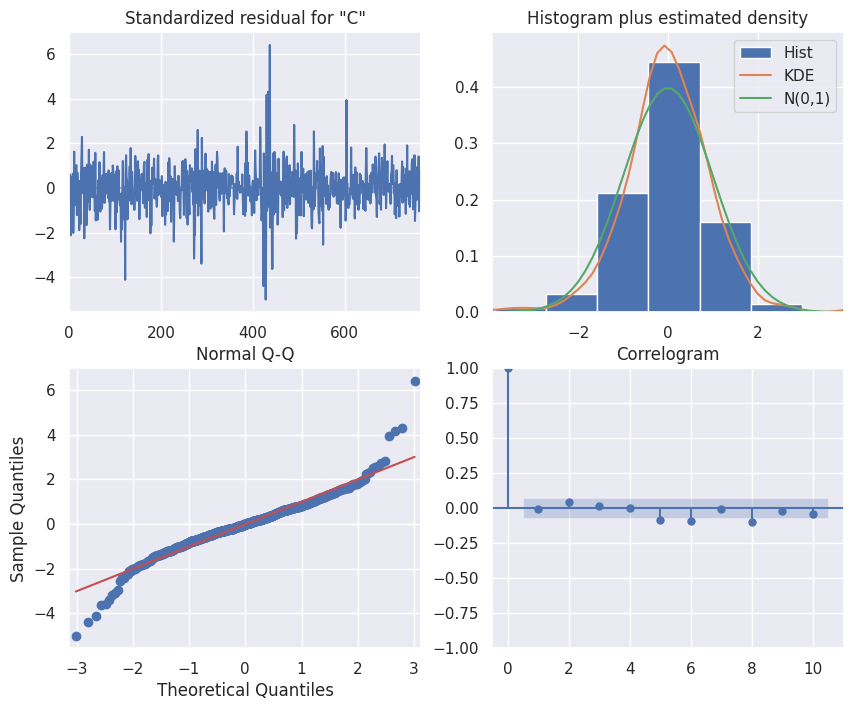

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -499.522
Date:                Wed, 28 Jun 2023   AIC                           1003.043
Time:                        23:11:03   BIC                           1012.362
Sample:                             0   HQIC                          1006.627
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0078      0.025     -0.308      0.758      -0.058       0.042
sigma2         0.2108      0.006     35.807      0.000       0.199       0.222
Ljung-Box (L1) (Q):                   0.00   Jarque-

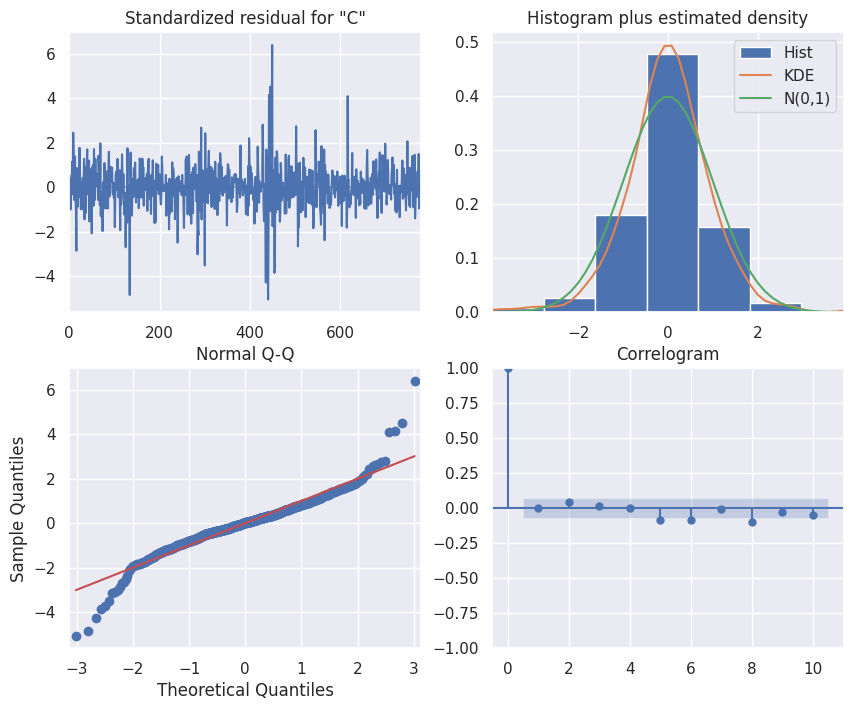

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -498.554
Date:                            Wed, 28 Jun 2023   AIC                           1003.107
Time:                                    23:11:05   BIC                           1017.085
Sample:                                         0   HQIC                          1008.483
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0087      0.026     -0.337      0.736      -0.059       0.042
ma.S.L12      -0.0518      0.027   

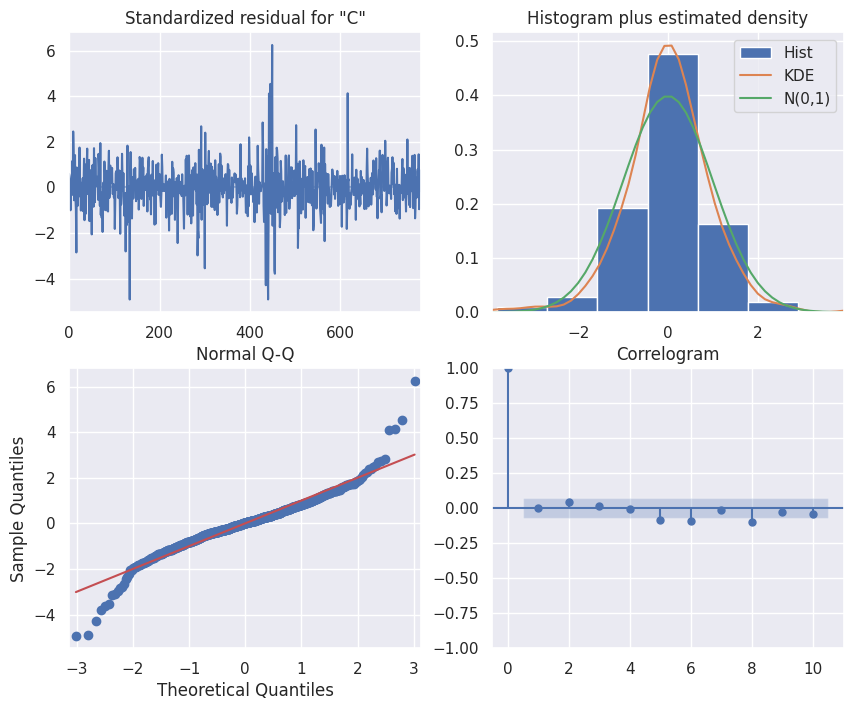

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -777.685
Date:                             Wed, 28 Jun 2023   AIC                           1559.369
Time:                                     23:11:06   BIC                           1568.657
Sample:                                          0   HQIC                          1562.944
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0005      0.027     -0.018      0.986      -0.054       0.053
sigma2         0.4437      

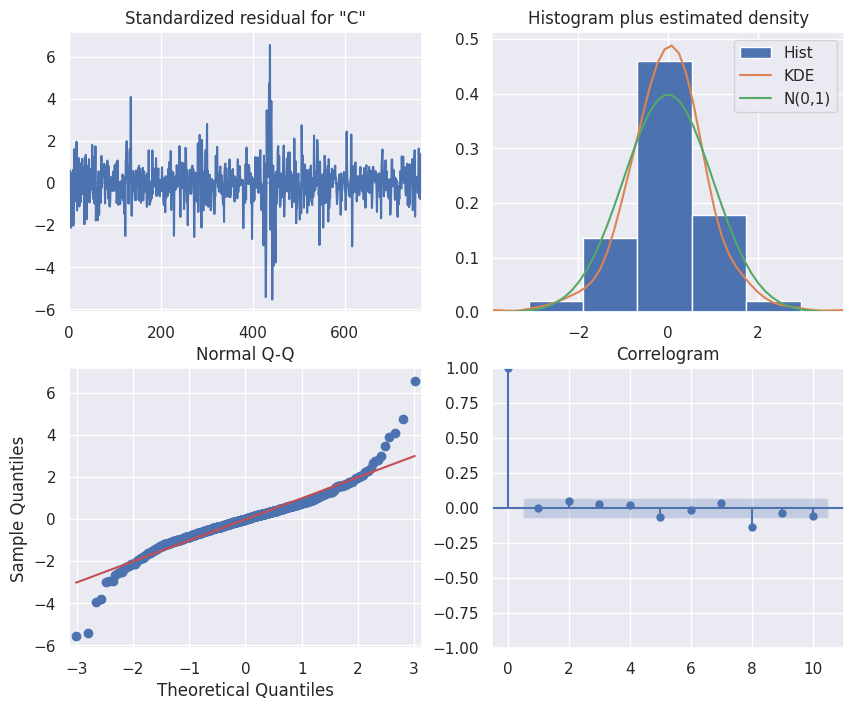

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -517.880
Date:                            Wed, 28 Jun 2023   AIC                           1041.759
Time:                                    23:11:10   BIC                           1055.691
Sample:                                         0   HQIC                          1047.121
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0072      0.026     -0.276      0.783      -0.058       0.044
ma.S.L12      -0.9996      1.575   

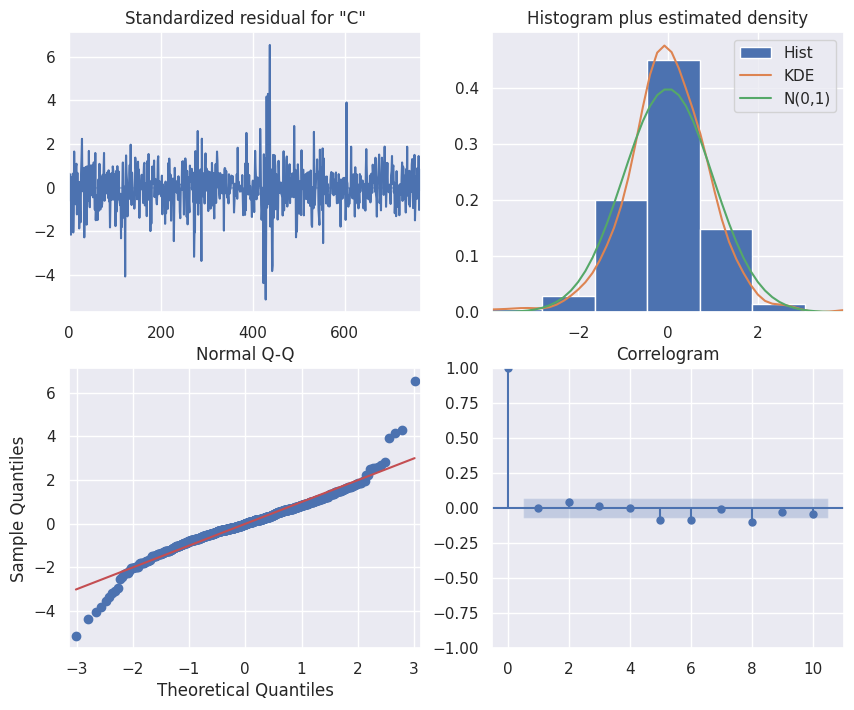

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -498.622
Date:                             Wed, 28 Jun 2023   AIC                           1003.244
Time:                                     23:11:12   BIC                           1017.222
Sample:                                          0   HQIC                          1008.620
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0086      0.026     -0.336      0.737      -0.059       0.042
ar.S.L12      -0.0482      

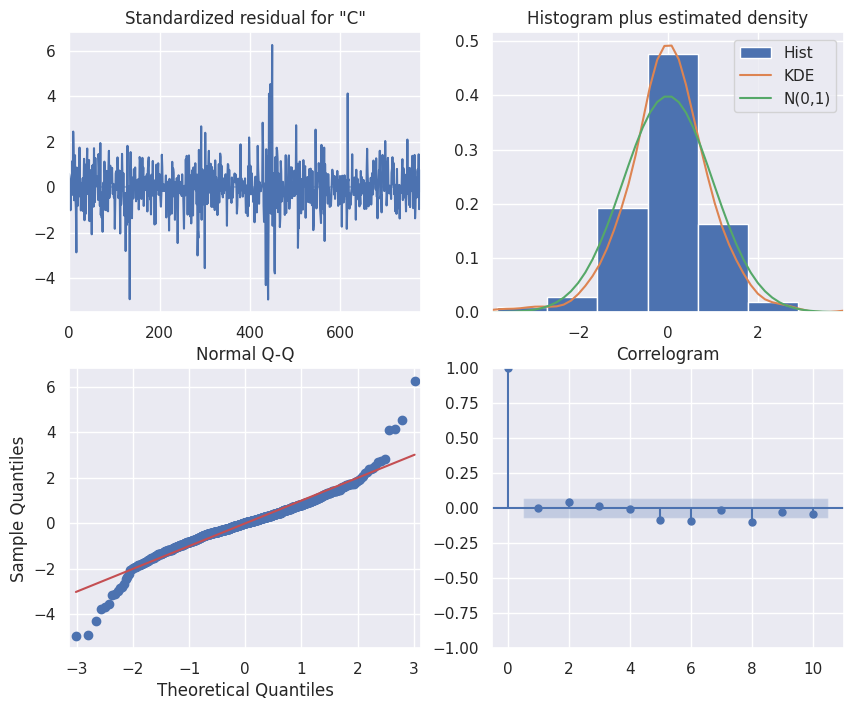

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -498.287
Date:                            Wed, 28 Jun 2023   AIC                           1004.574
Time:                                    23:11:13   BIC                           1023.211
Sample:                                         0   HQIC                          1011.742
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0092      0.026     -0.359      0.719      -0.060       0.041
ar.S.L12       0.3248      0.609   

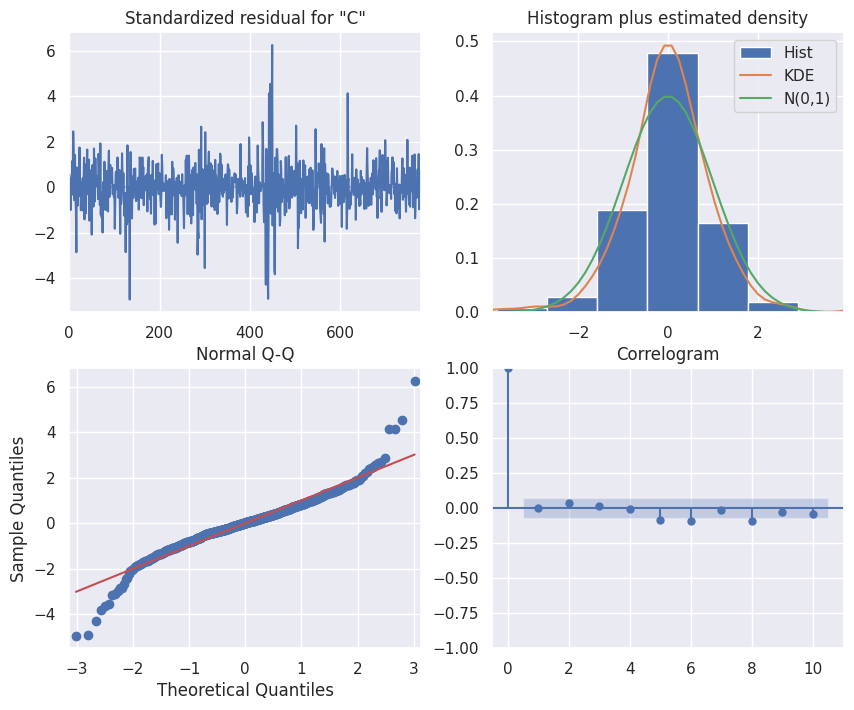

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -665.318
Date:                             Wed, 28 Jun 2023   AIC                           1336.636
Time:                                     23:11:15   BIC                           1350.567
Sample:                                          0   HQIC                          1341.998
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0118      0.028     -0.422      0.673      -0.067       0.043
ar.S.L12      -0.5068      

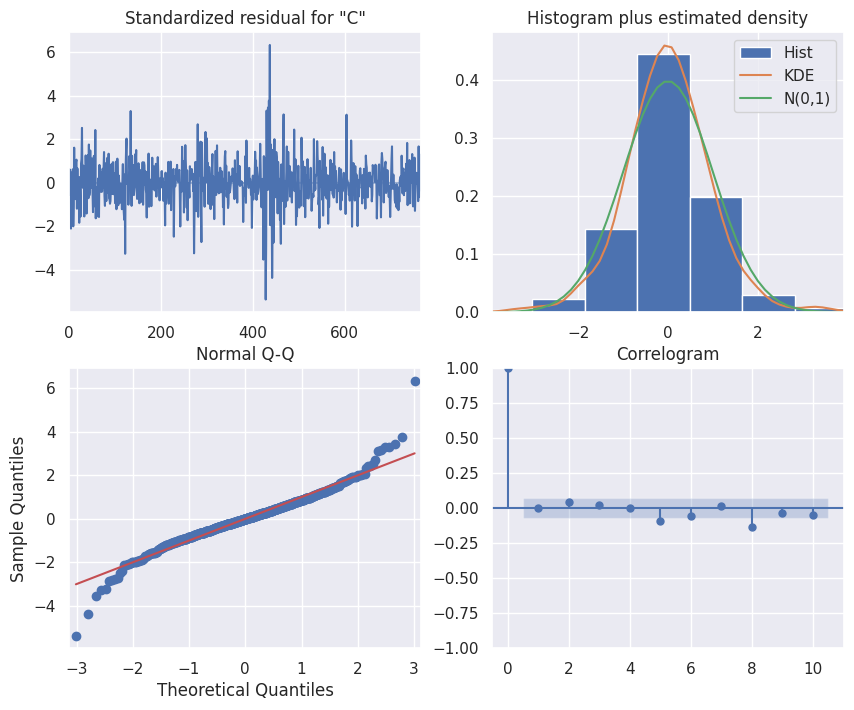

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -517.033
Date:                            Wed, 28 Jun 2023   AIC                           1042.067
Time:                                    23:11:20   BIC                           1060.642
Sample:                                         0   HQIC                          1049.216
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0076      0.026     -0.289      0.772      -0.059       0.044
ar.S.L12      -0.0475      0.030   

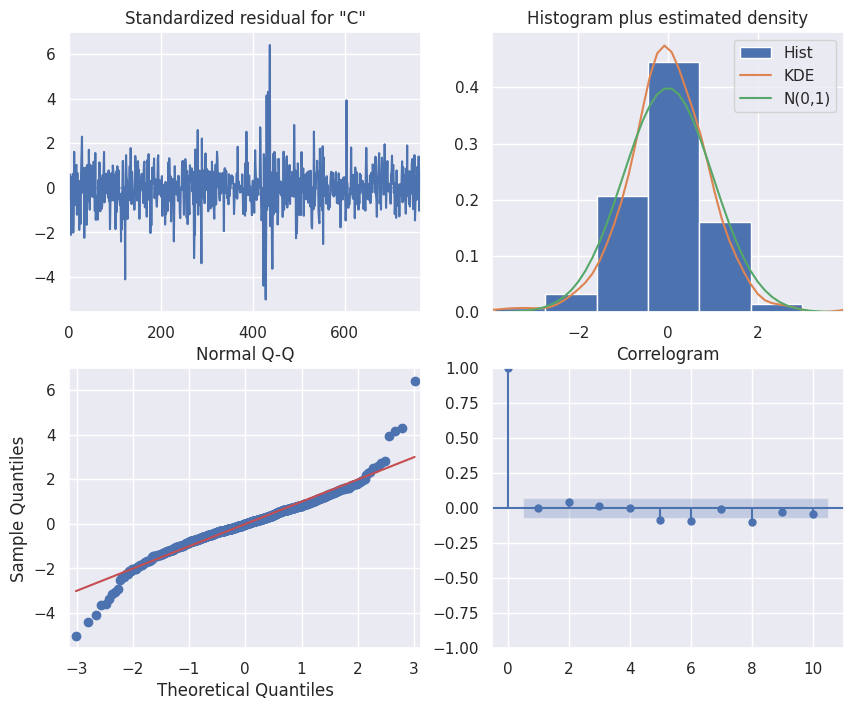

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -506.674
Date:                Wed, 28 Jun 2023   AIC                           1017.348
Time:                        23:11:21   BIC                           1026.669
Sample:                             0   HQIC                          1020.932
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000    9.5e-07   1.05e+06      0.000       1.000       1.000
sigma2         0.2105      0.006     37.696      0.000       0.200       0.221
Ljung-Box (L1) (Q):                   0.05   Jarque-

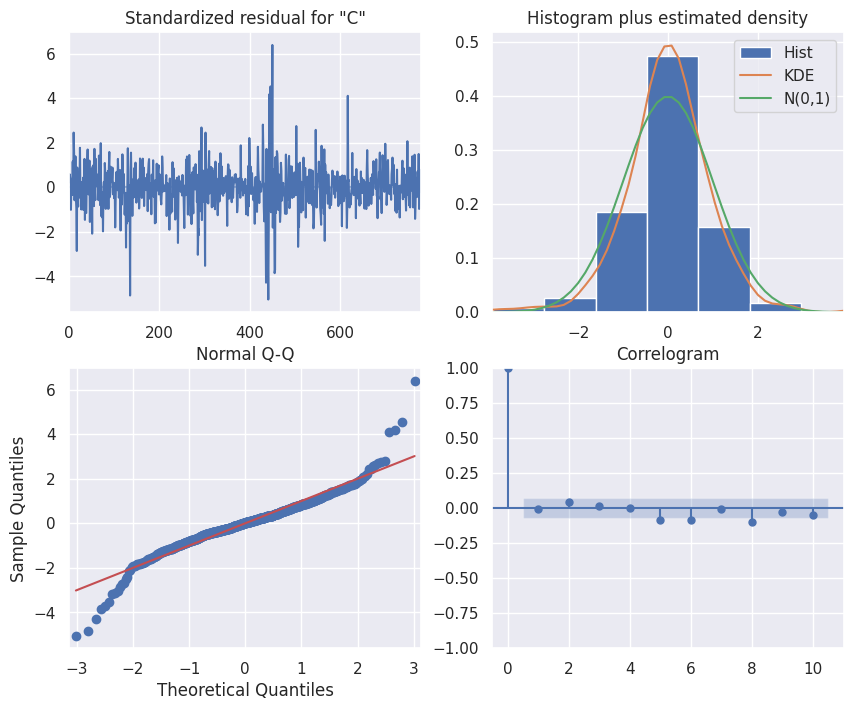

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -505.660
Date:                              Wed, 28 Jun 2023   AIC                           1017.320
Time:                                      23:11:22   BIC                           1031.301
Sample:                                           0   HQIC                          1022.697
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   9.56e-07   1.05e+06      0.000       1.000       1.000
ma.S.L12      -0.05

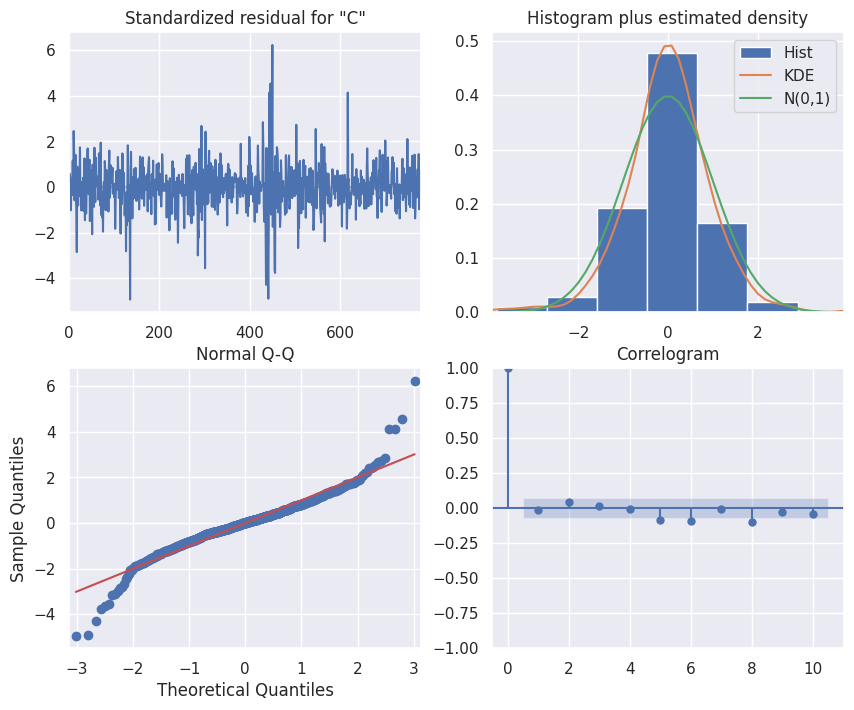

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -758.225
Date:                            Wed, 28 Jun 2023   AIC                           1520.451
Time:                                    23:11:24   BIC                           1529.741
Sample:                                         0   HQIC                          1524.026
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8915      0.009     98.047      0.000       0.874       0.909
sigma2         0.4198      0.010   

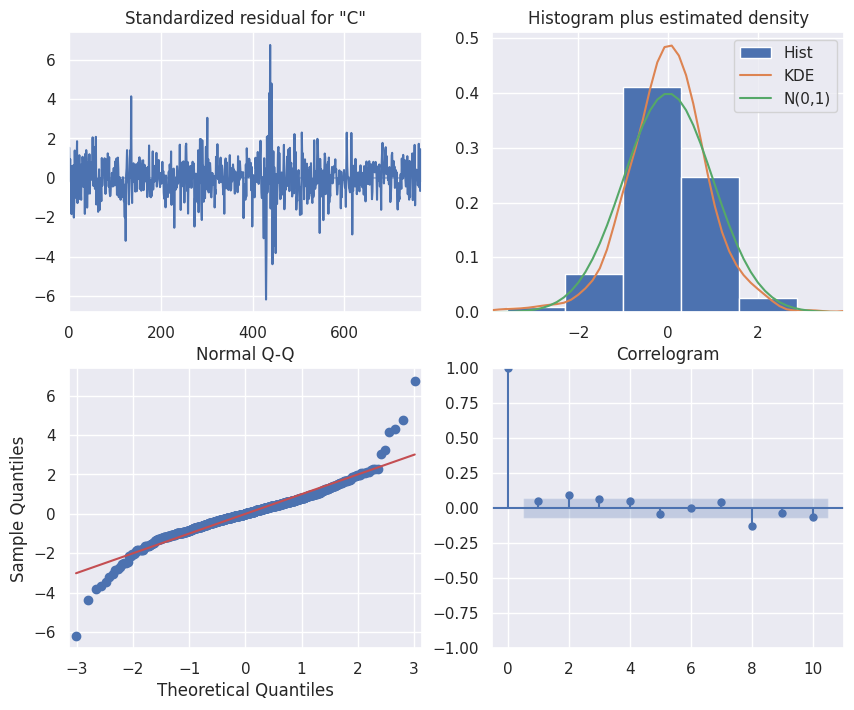

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -515.330
Date:                              Wed, 28 Jun 2023   AIC                           1036.660
Time:                                      23:11:28   BIC                           1050.596
Sample:                                           0   HQIC                          1042.024
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9863      0.006    154.633      0.000       0.974       0.999
ma.S.L12      -0.99

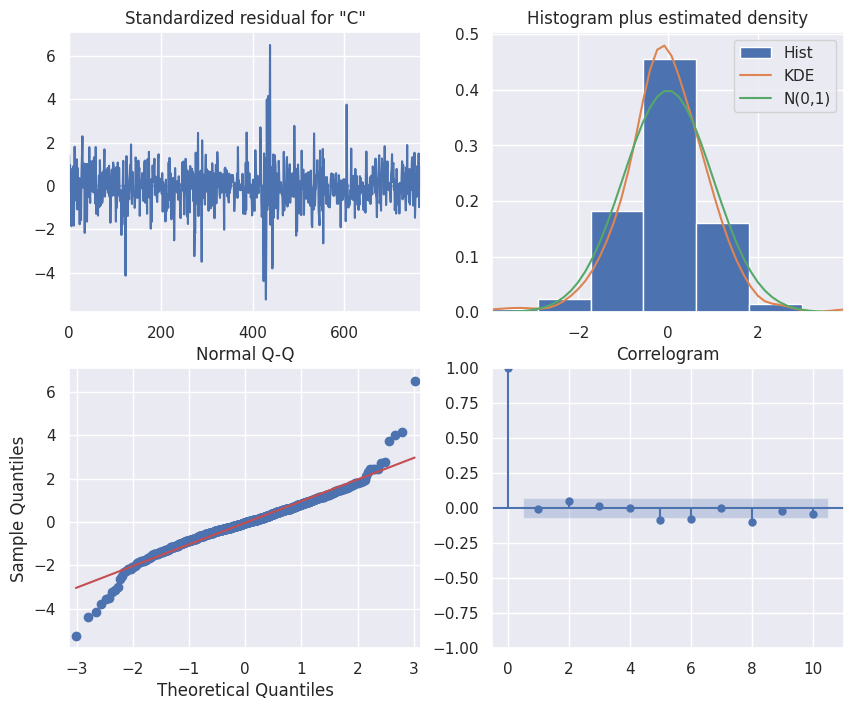

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -847.135
Date:                            Wed, 28 Jun 2023   AIC                           1700.270
Time:                                    23:11:30   BIC                           1714.252
Sample:                                         0   HQIC                          1705.647
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.65e-06   6.06e+05      0.000       1.000       1.000
ar.S.L12       0.9998      0.000   

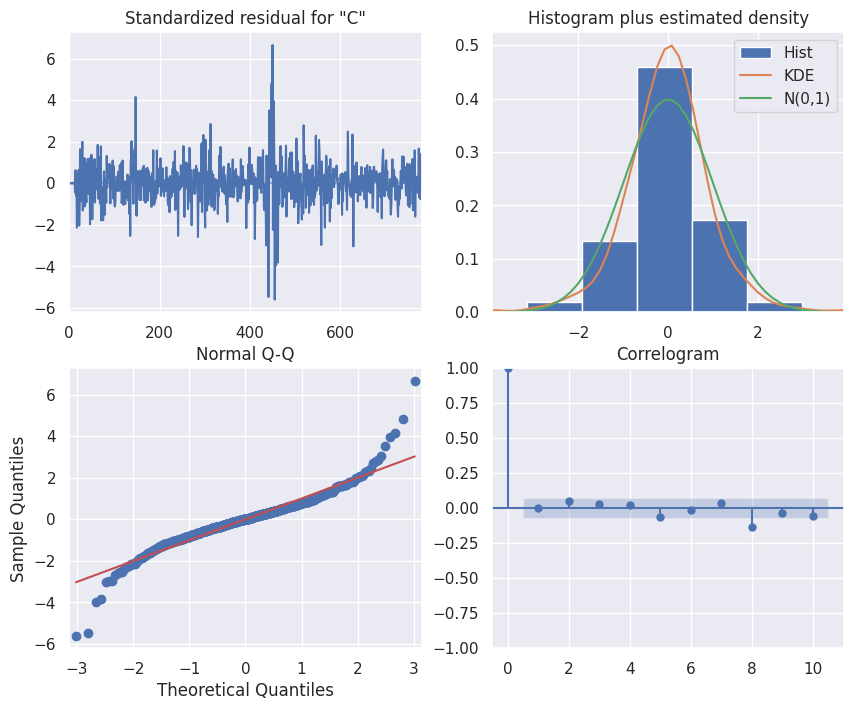

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -670.737
Date:                              Wed, 28 Jun 2023   AIC                           1349.474
Time:                                      23:11:33   BIC                           1368.117
Sample:                                           0   HQIC                          1356.644
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   5.54e-06   1.81e+05      0.000       1.000       1.000
ar.S.L12       0.99

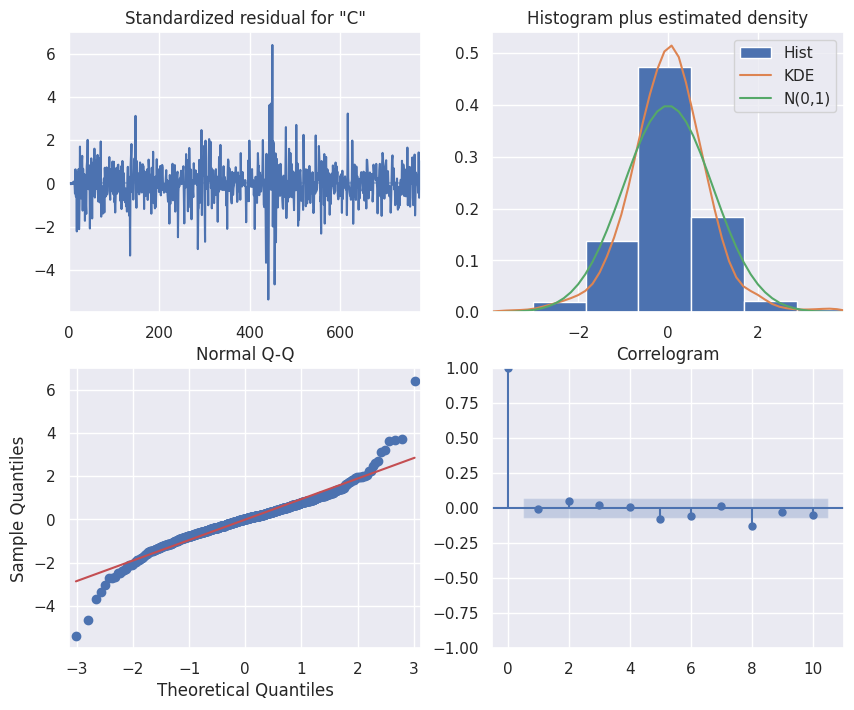

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -650.988
Date:                            Wed, 28 Jun 2023   AIC                           1307.976
Time:                                    23:11:35   BIC                           1321.911
Sample:                                         0   HQIC                          1313.339
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9179      0.010     89.615      0.000       0.898       0.938
ar.S.L12      -0.4993      0.024   

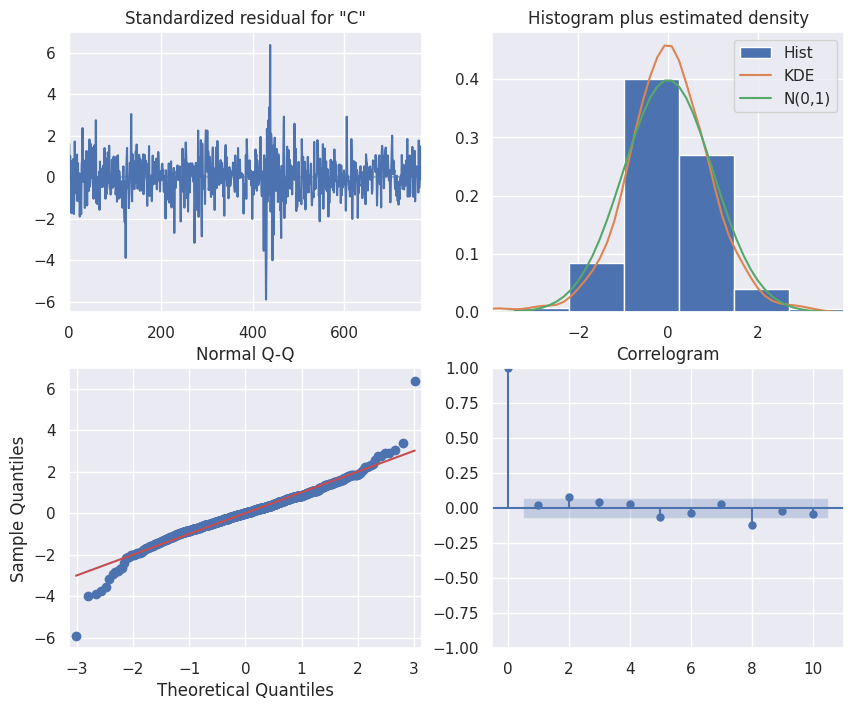

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -514.645
Date:                              Wed, 28 Jun 2023   AIC                           1037.290
Time:                                      23:11:39   BIC                           1055.871
Sample:                                           0   HQIC                          1044.441
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9875      0.006    156.946      0.000       0.975       1.000
ar.S.L12      -0.04

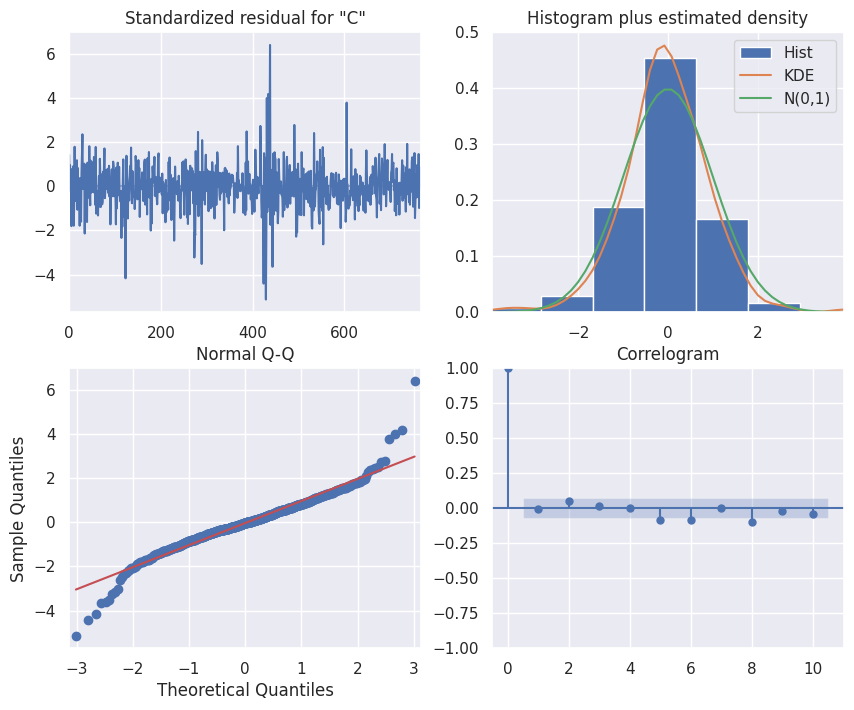

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -505.666
Date:                Wed, 28 Jun 2023   AIC                           1017.331
Time:                        23:11:41   BIC                           1031.313
Sample:                             0   HQIC                          1022.709
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.45e-05   2.25e+04      0.000       1.000       1.000
ma.L1         -0.0081      0.025     -0.320      0.749      -0.058       0.042
sigma2         0.2107      0.006     35.817      0.0

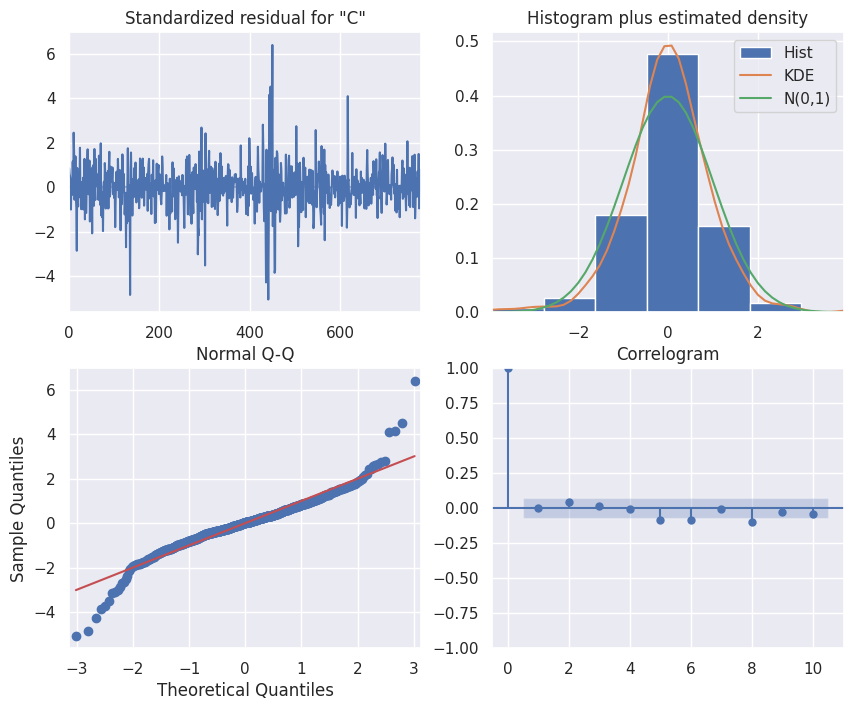

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -504.686
Date:                            Wed, 28 Jun 2023   AIC                           1017.371
Time:                                    23:11:43   BIC                           1036.014
Sample:                                         0   HQIC                          1024.541
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   6.18e-05   1.62e+04      0.000       1.000       1.000
ma.L1         -0.0089      0.026   

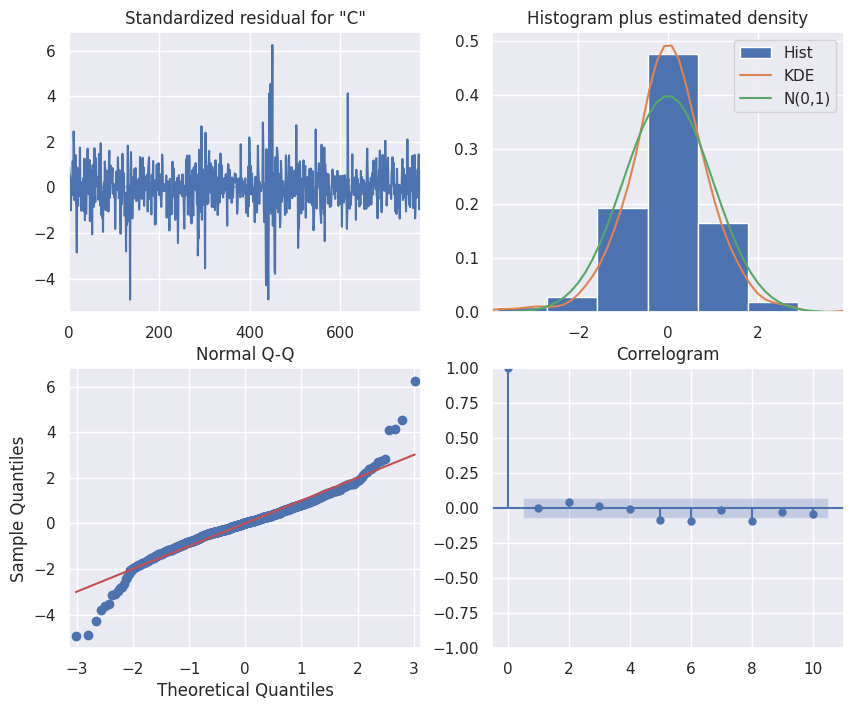

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                -757.221
Date:                             Wed, 28 Jun 2023   AIC                           1520.442
Time:                                     23:11:45   BIC                           1534.377
Sample:                                          0   HQIC                          1525.805
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8810      0.013     66.066      0.000       0.855       0.907
ma.L1          0.0514      

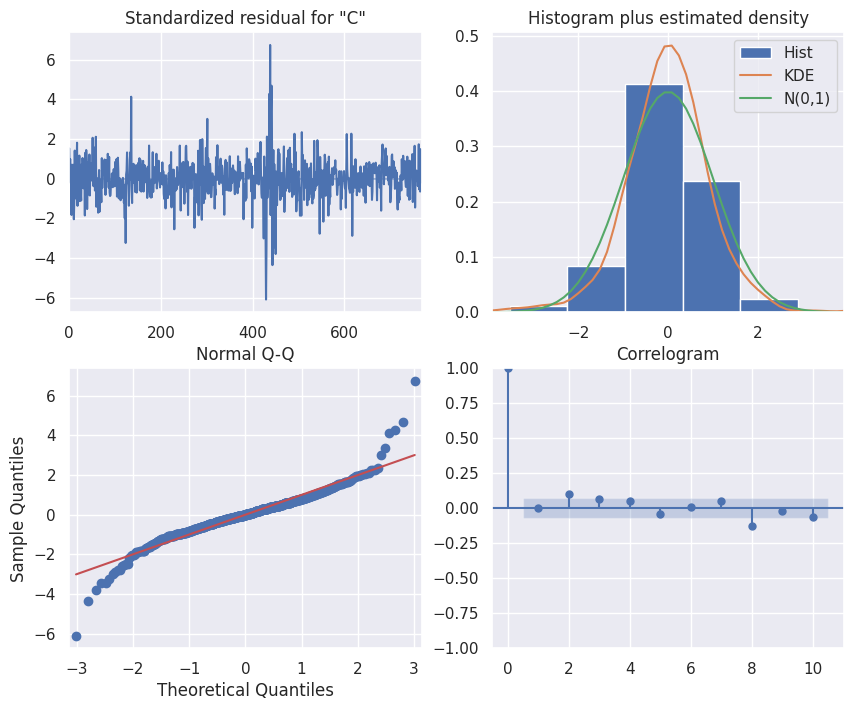

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -515.329
Date:                            Wed, 28 Jun 2023   AIC                           1038.658
Time:                                    23:11:49   BIC                           1057.239
Sample:                                         0   HQIC                          1045.809
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9864      0.007    142.502      0.000       0.973       1.000
ma.L1         -0.0020      0.028   

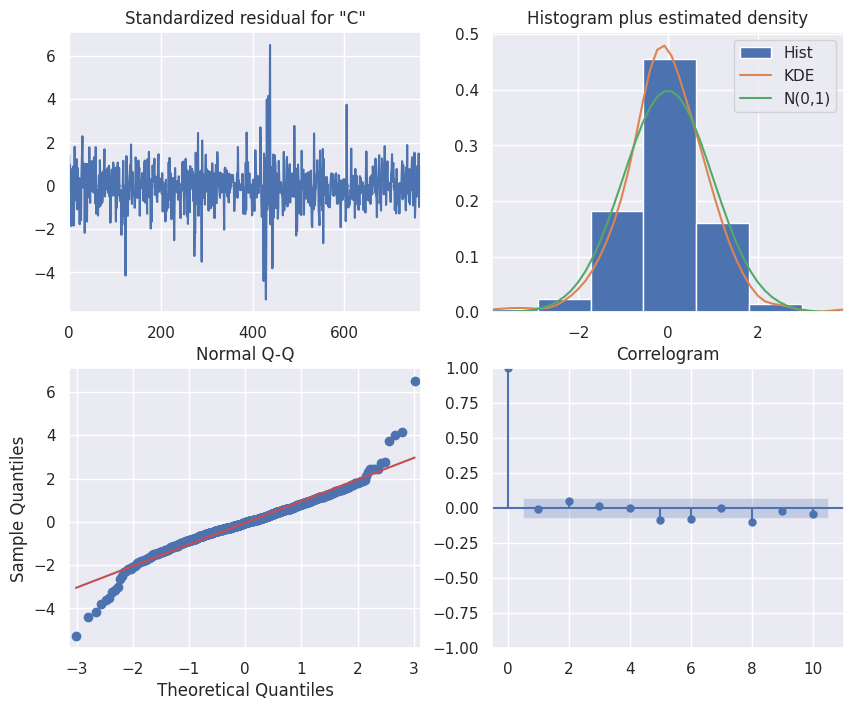

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -846.472
Date:                             Wed, 28 Jun 2023   AIC                           1700.944
Time:                                     23:11:52   BIC                           1719.587
Sample:                                          0   HQIC                          1708.114
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.87e-05   2.58e+04      0.000       1.000       1.000
ma.L1         -0.0069   8.9

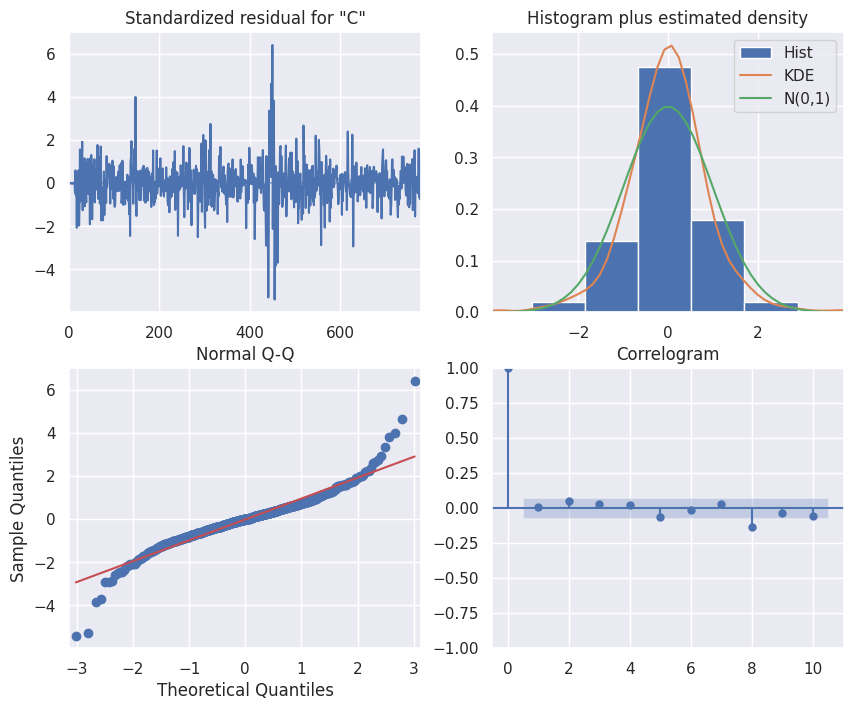

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -506.365
Date:                            Wed, 28 Jun 2023   AIC                           1022.730
Time:                                    23:11:55   BIC                           1046.033
Sample:                                         0   HQIC                          1031.692
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   4404.292      0.000       1.000       1.000
ma.L1          0.0309      0.001   

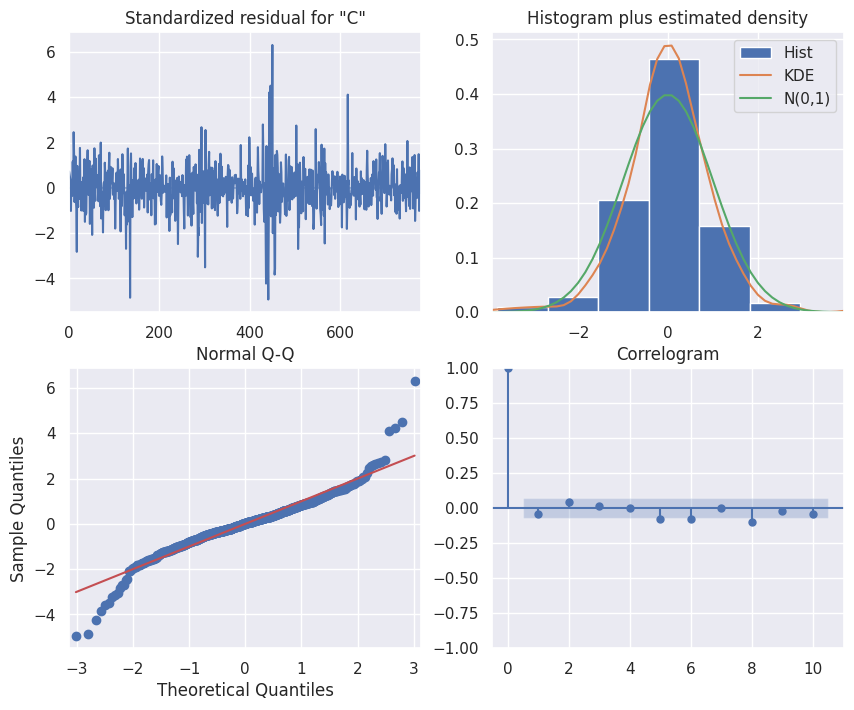

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -650.706
Date:                             Wed, 28 Jun 2023   AIC                           1309.412
Time:                                     23:11:57   BIC                           1327.992
Sample:                                          0   HQIC                          1316.563
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9135      0.012     73.638      0.000       0.889       0.938
ma.L1          0.0270      

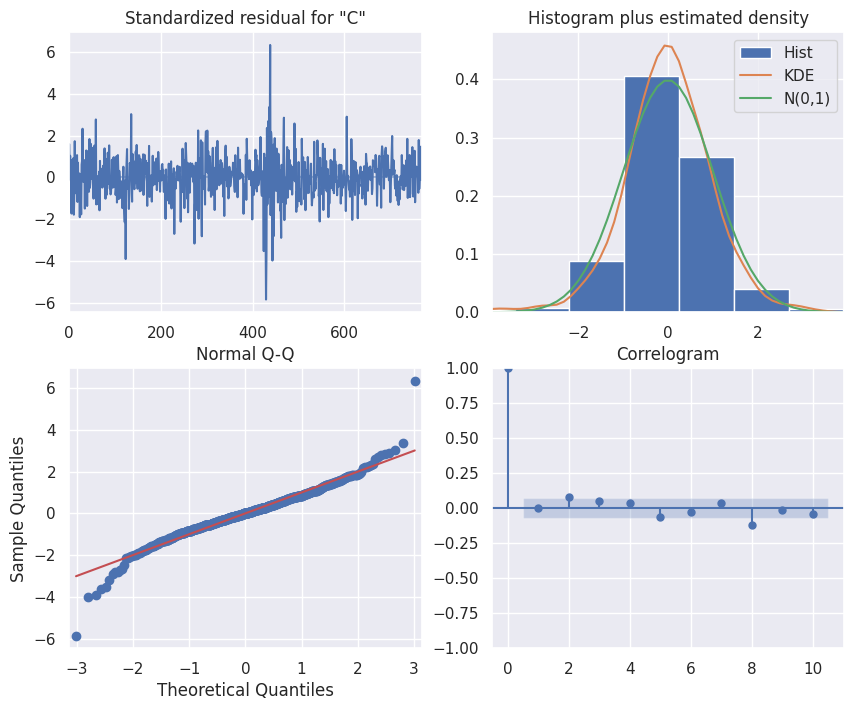

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -514.641
Date:                            Wed, 28 Jun 2023   AIC                           1039.282
Time:                                    23:12:04   BIC                           1062.507
Sample:                                         0   HQIC                          1048.221
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9876      0.007    145.535      0.000       0.974       1.001
ma.L1         -0.0031      0.028   

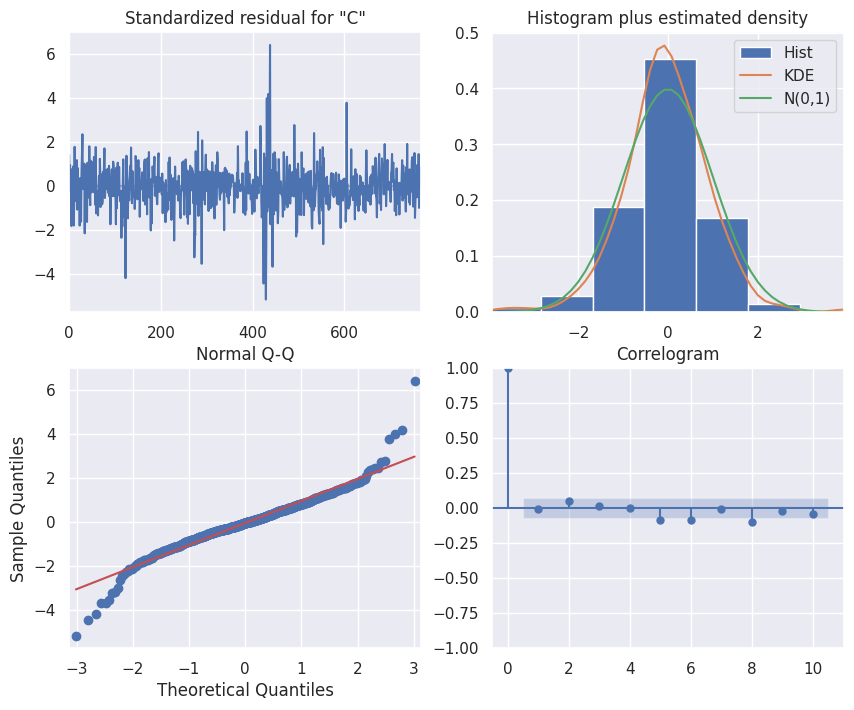

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -499.519
Date:                Wed, 28 Jun 2023   AIC                           1003.039
Time:                        23:12:05   BIC                           1012.357
Sample:                             0   HQIC                          1006.623
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0085      0.025     -0.333      0.739      -0.058       0.041
sigma2         0.2108      0.006     35.818      0.000       0.199       0.222
Ljung-Box (L1) (Q):                   0.00   Jarque-

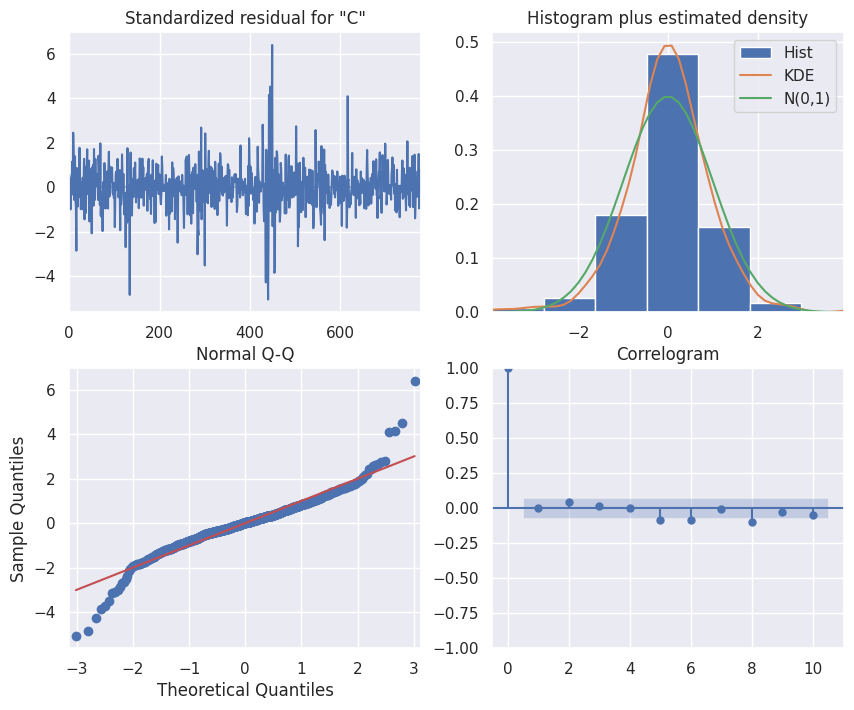

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -498.551
Date:                              Wed, 28 Jun 2023   AIC                           1003.102
Time:                                      23:12:06   BIC                           1017.080
Sample:                                           0   HQIC                          1008.478
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0094      0.026     -0.363      0.716      -0.060       0.041
ma.S.L12      -0.05

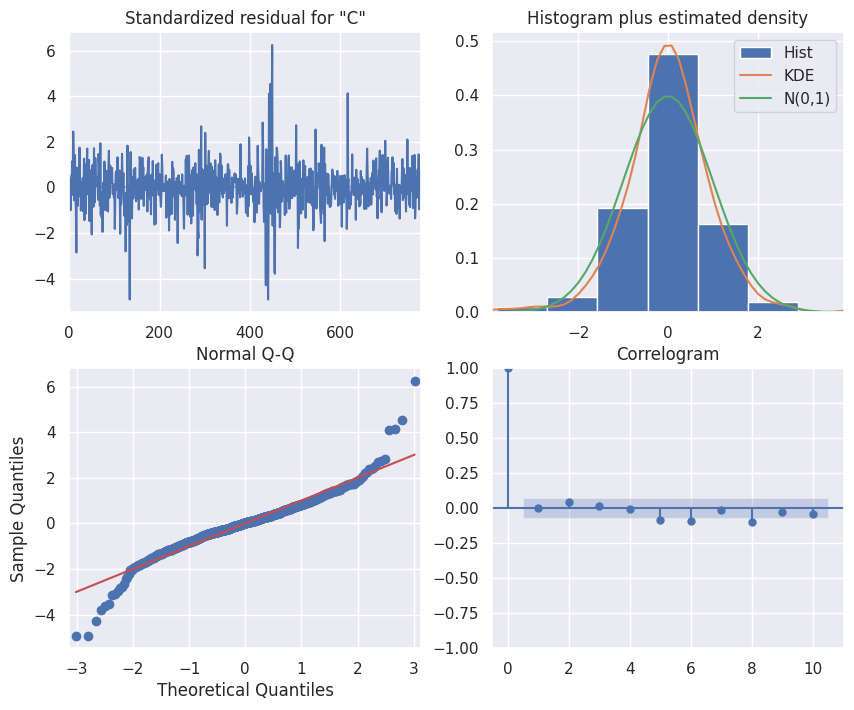

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -777.685
Date:                            Wed, 28 Jun 2023   AIC                           1559.369
Time:                                    23:12:07   BIC                           1568.657
Sample:                                         0   HQIC                          1562.944
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0005      0.027     -0.020      0.984      -0.054       0.053
sigma2         0.4437      0.011   

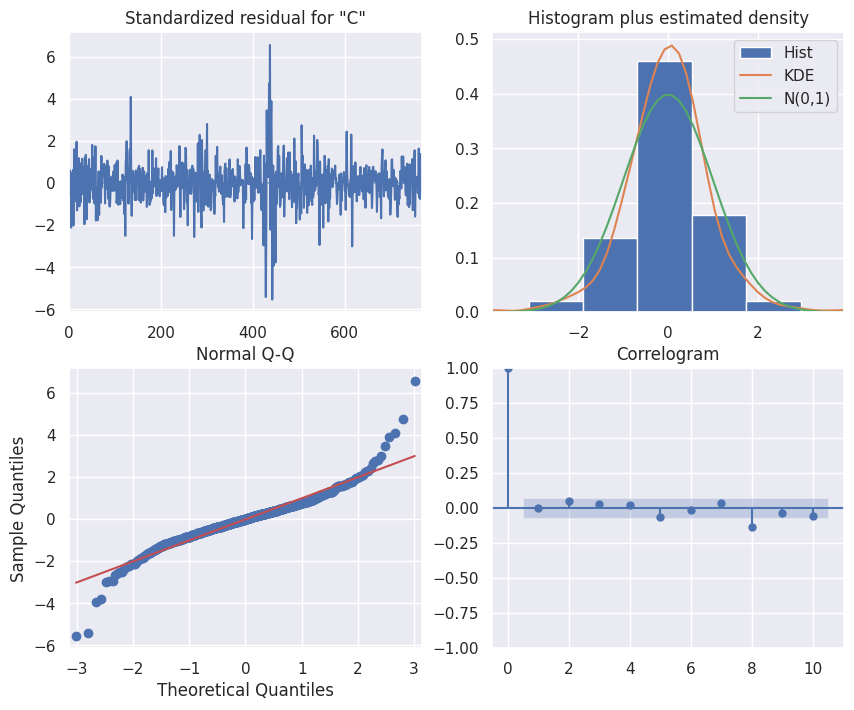

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -517.879
Date:                              Wed, 28 Jun 2023   AIC                           1041.758
Time:                                      23:12:11   BIC                           1055.690
Sample:                                           0   HQIC                          1047.120
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0074      0.026     -0.284      0.777      -0.058       0.044
ma.S.L12      -0.99

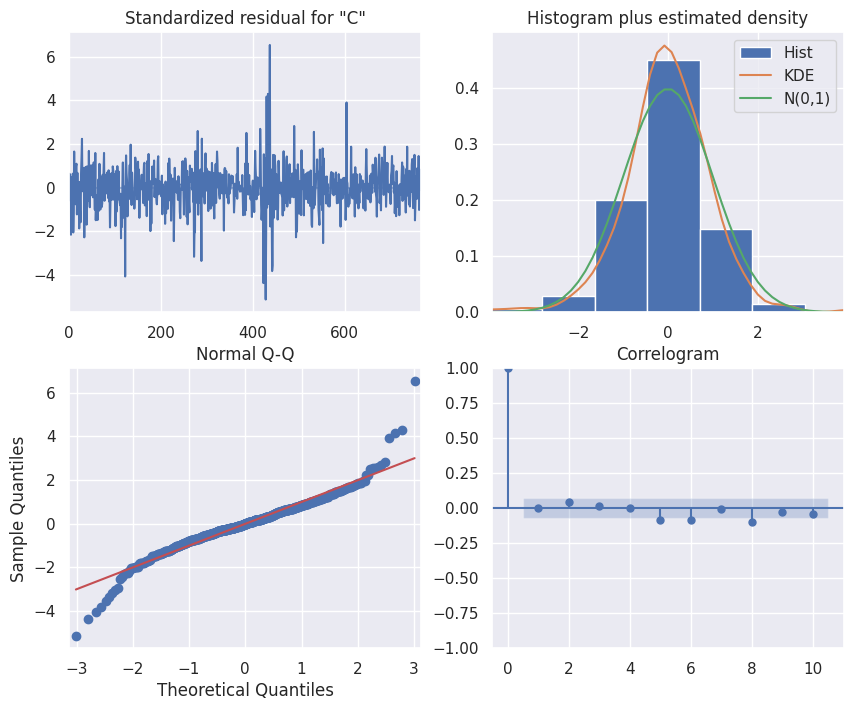

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -498.619
Date:                            Wed, 28 Jun 2023   AIC                           1003.239
Time:                                    23:12:13   BIC                           1017.217
Sample:                                         0   HQIC                          1008.615
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0093      0.026     -0.362      0.717      -0.060       0.041
ar.S.L12      -0.0482      0.027   

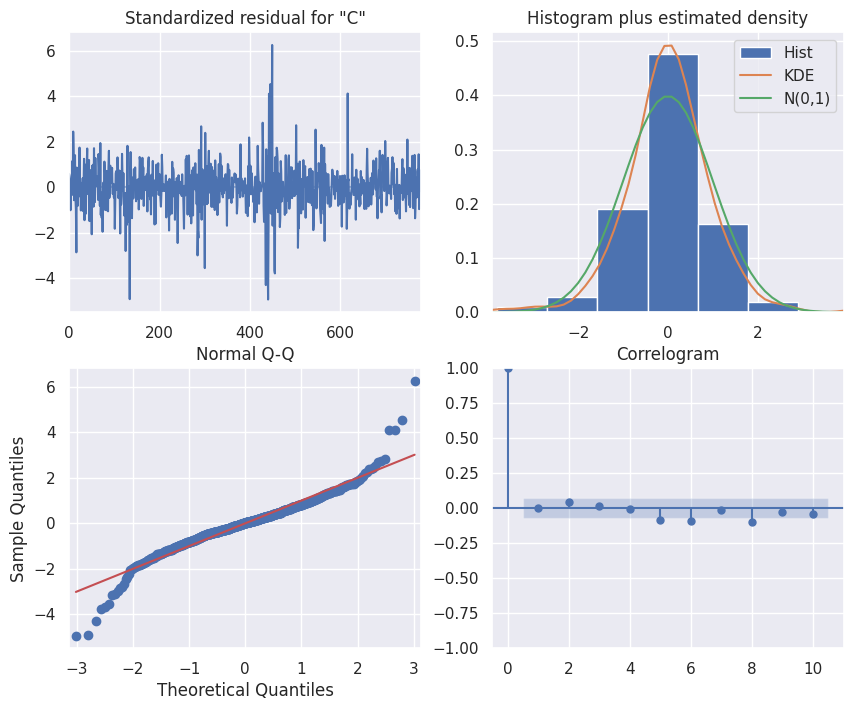

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -498.284
Date:                              Wed, 28 Jun 2023   AIC                           1004.568
Time:                                      23:12:14   BIC                           1023.205
Sample:                                           0   HQIC                          1011.736
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0100      0.026     -0.387      0.699      -0.061       0.041
ar.S.L12       0.32

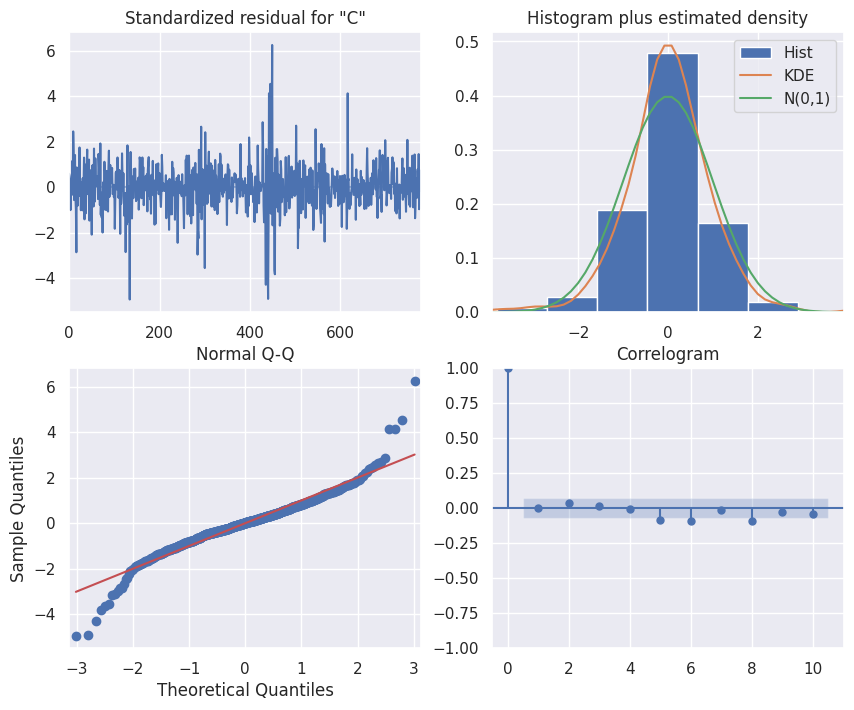

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -665.312
Date:                            Wed, 28 Jun 2023   AIC                           1336.625
Time:                                    23:12:15   BIC                           1350.556
Sample:                                         0   HQIC                          1341.987
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0129      0.028     -0.459      0.646      -0.068       0.042
ar.S.L12      -0.5069      0.023   

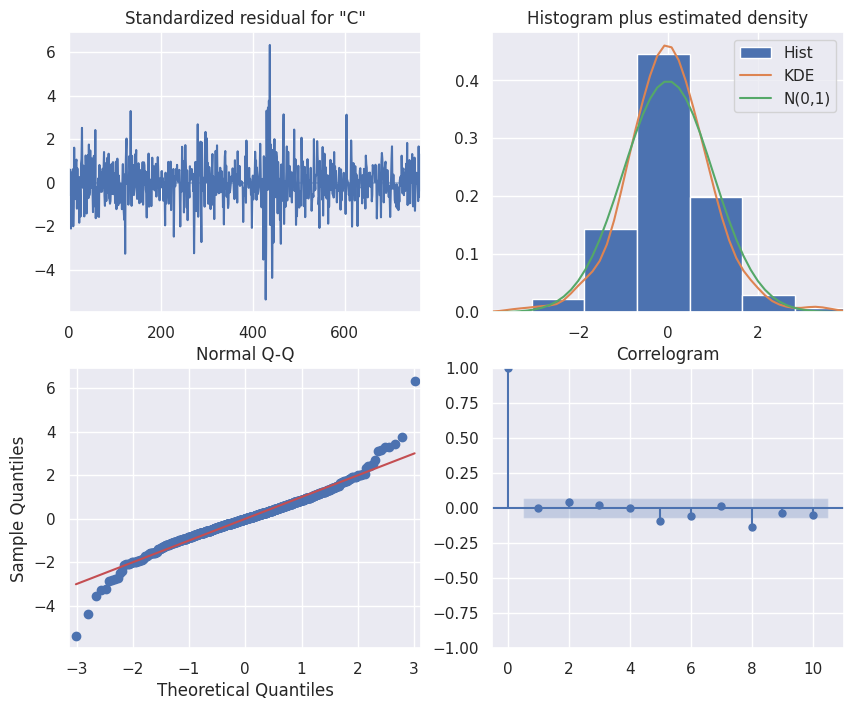

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -517.031
Date:                              Wed, 28 Jun 2023   AIC                           1042.062
Time:                                      23:12:21   BIC                           1060.638
Sample:                                           0   HQIC                          1049.212
                                              - 781                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0082      0.026     -0.310      0.756      -0.060       0.043
ar.S.L12      -0.04

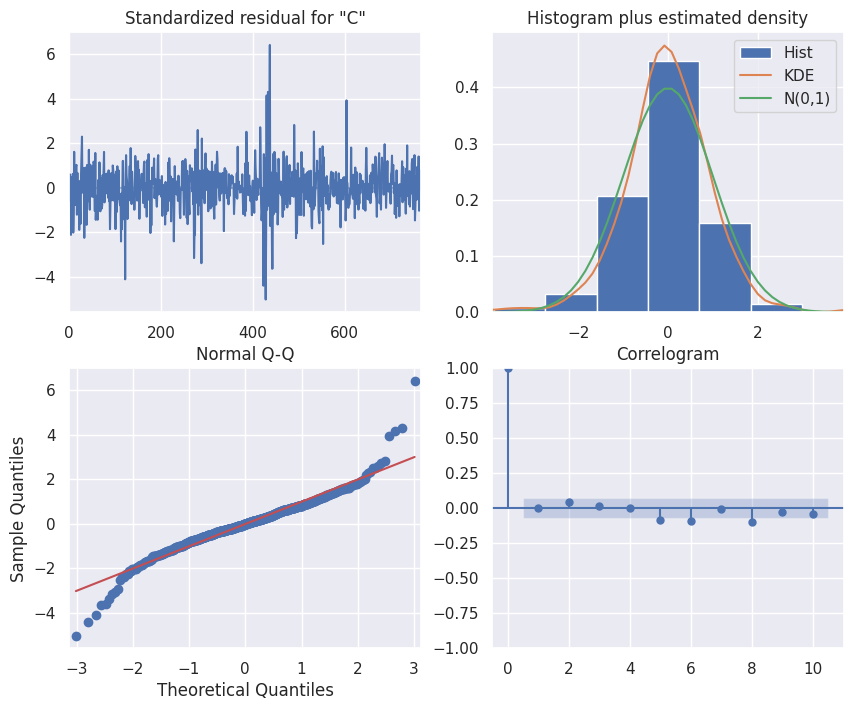

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  781
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -499.327
Date:                Wed, 28 Jun 2023   AIC                           1004.653
Time:                        23:12:22   BIC                           1018.631
Sample:                             0   HQIC                          1010.029
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5649      0.702     -0.804      0.421      -1.942       0.812
ma.L1          0.5453      0.719      0.759      0.448      -0.864       1.954
sigma2         0.2106      0.006     35.881      0.0

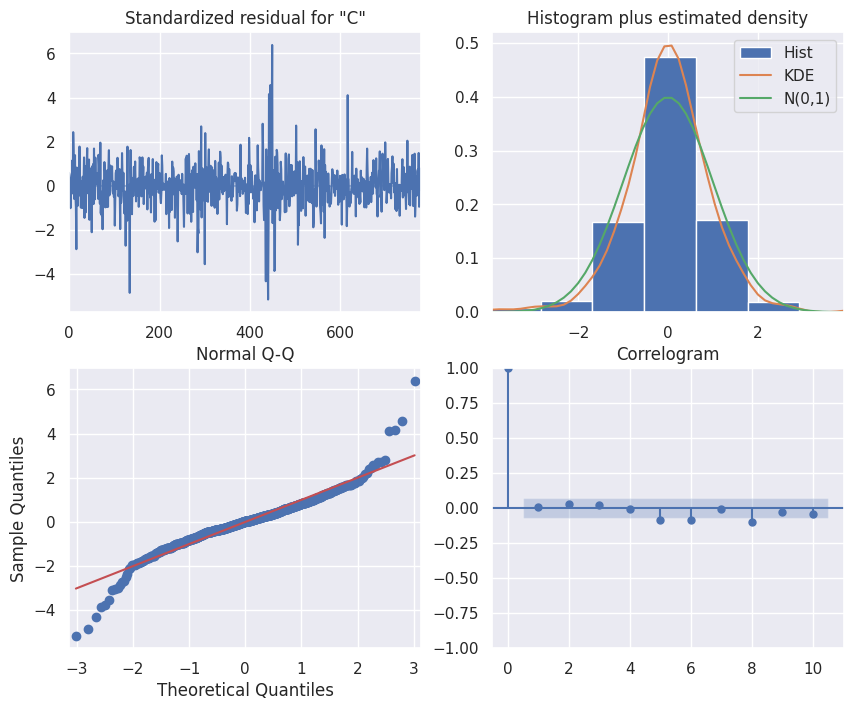

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -498.356
Date:                            Wed, 28 Jun 2023   AIC                           1004.713
Time:                                    23:12:24   BIC                           1023.350
Sample:                                         0   HQIC                          1011.881
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5638      0.713     -0.791      0.429      -1.960       0.833
ma.L1          0.5439      0.729   

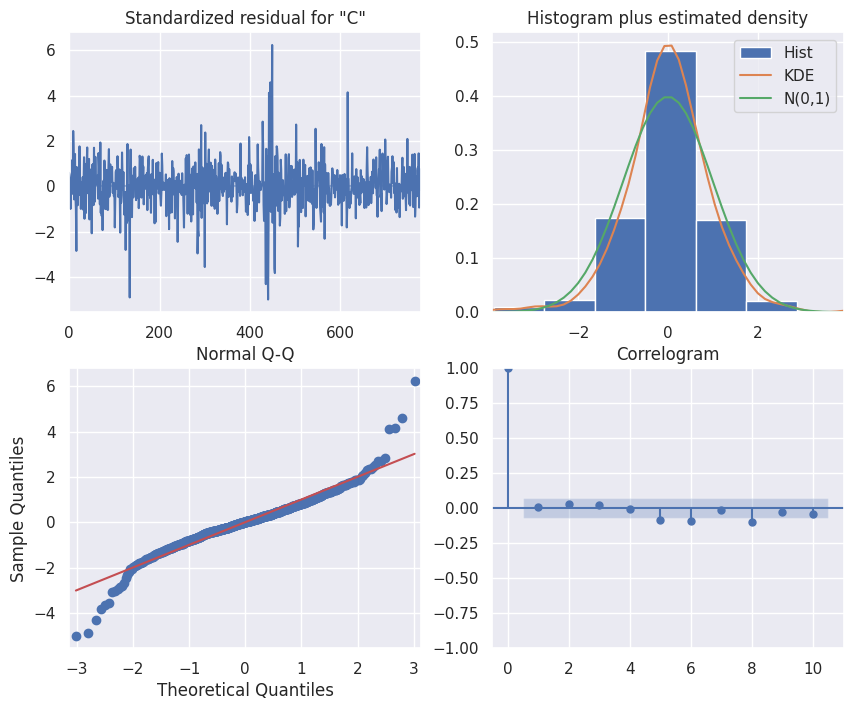

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -777.416
Date:                             Wed, 28 Jun 2023   AIC                           1560.831
Time:                                     23:12:26   BIC                           1574.763
Sample:                                          0   HQIC                          1566.193
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5596      0.626      0.894      0.371      -0.667       1.787
ma.L1         -0.5377      

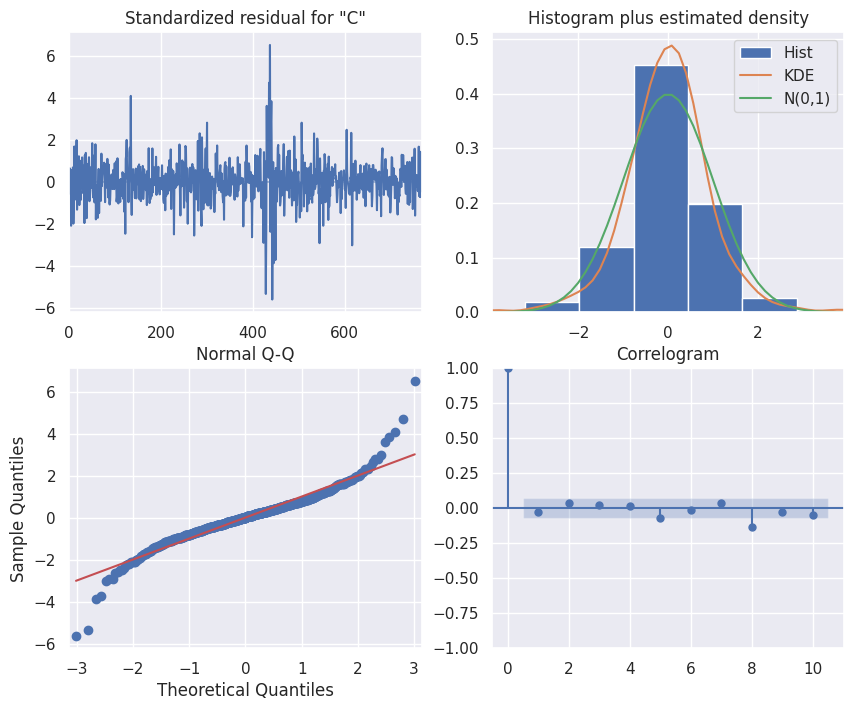

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -517.866
Date:                            Wed, 28 Jun 2023   AIC                           1043.732
Time:                                    23:12:30   BIC                           1062.307
Sample:                                         0   HQIC                          1050.881
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4595      2.259      0.203      0.839      -3.969       4.888
ma.L1         -0.4511      2.277   

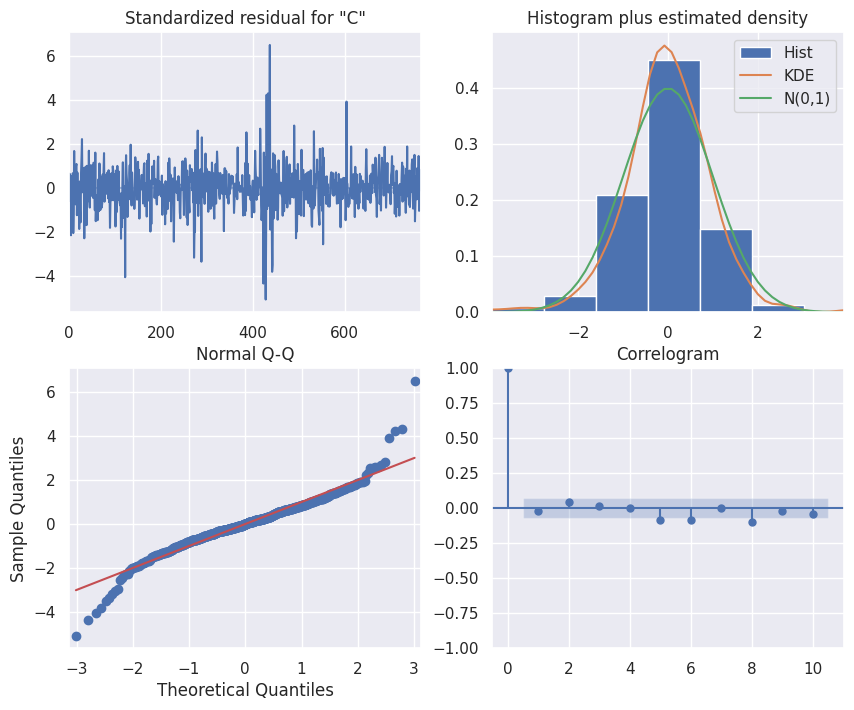

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -498.650
Date:                             Wed, 28 Jun 2023   AIC                           1005.301
Time:                                     23:12:31   BIC                           1023.938
Sample:                                          0   HQIC                          1012.469
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1497      8.711      0.017      0.986     -16.924      17.223
ma.L1         -0.1524      

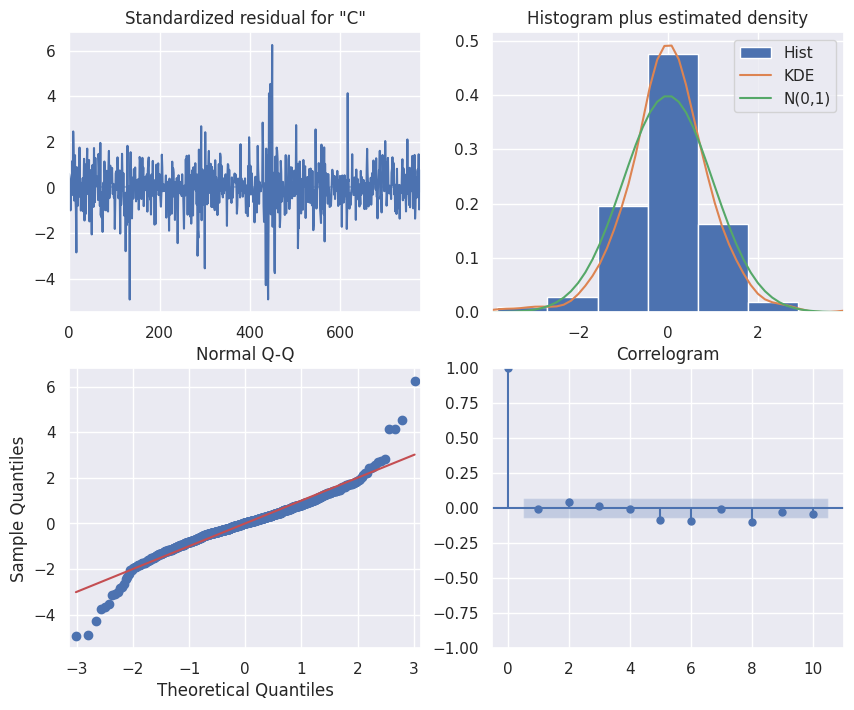

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -498.314
Date:                            Wed, 28 Jun 2023   AIC                           1006.629
Time:                                    23:12:33   BIC                           1029.925
Sample:                                         0   HQIC                          1015.589
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1209      5.250      0.023      0.982     -10.169      10.411
ma.L1         -0.1255      5.243   

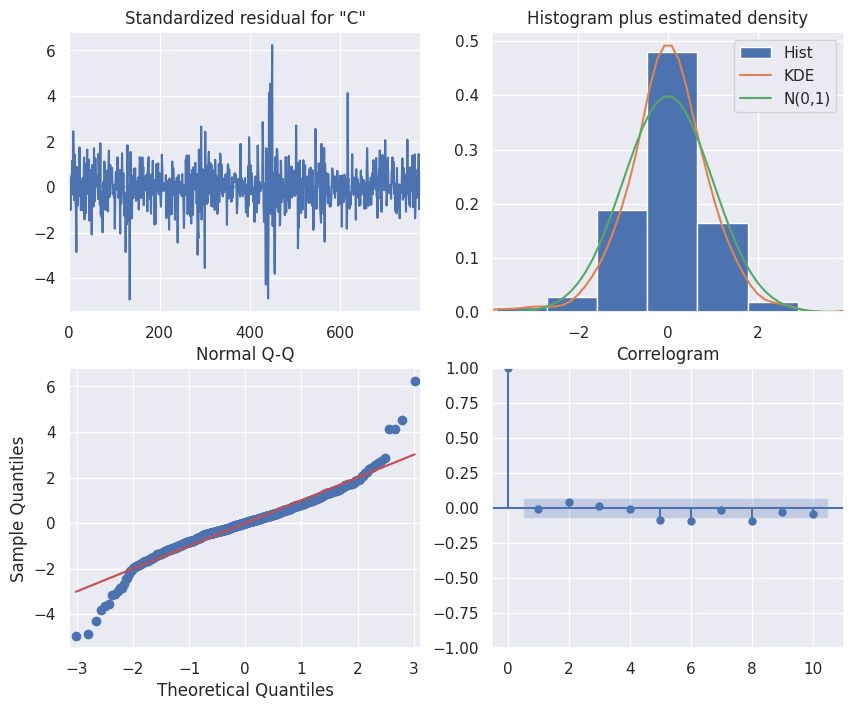

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -665.359
Date:                             Wed, 28 Jun 2023   AIC                           1338.718
Time:                                     23:12:34   BIC                           1357.293
Sample:                                          0   HQIC                          1345.868
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4832      2.931      0.165      0.869      -5.262       6.228
ma.L1         -0.4772      

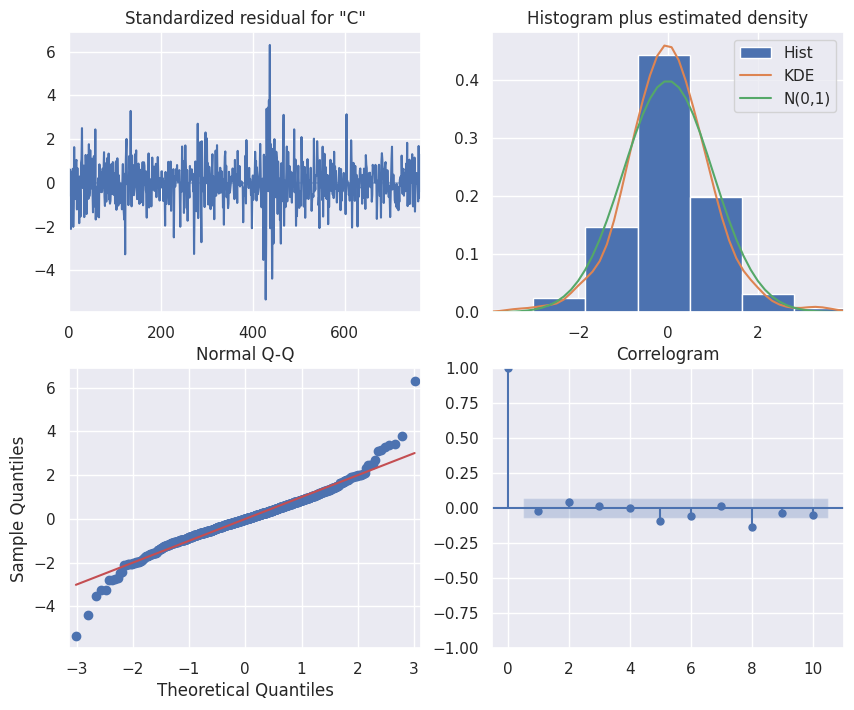

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -517.034
Date:                            Wed, 28 Jun 2023   AIC                           1044.067
Time:                                    23:12:41   BIC                           1067.286
Sample:                                         0   HQIC                          1053.004
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4386      2.903      0.151      0.880      -5.251       6.128
ma.L1         -0.4316      2.920   

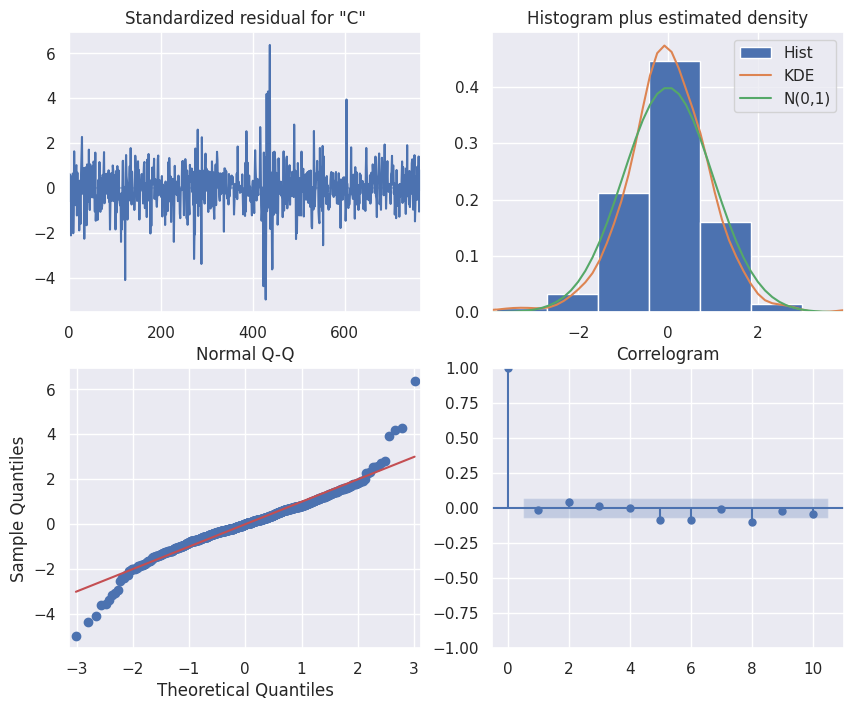

In [ ]:
# Define a function for SARIMA model fitting and diagnostics
def fit_sarima(order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    model_fit.plot_diagnostics(figsize=(10, 8))
    plt.show()

# Specify different combinations of parameters to evaluate
p = d = q = range(0, 2)  # Consider AR, I, and MA components in the range [0, 1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Consider seasonal components with period 12 (months)

# Iterate over combinations and fit SARIMA models
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            fit_sarima(param, param_seasonal)
        except:
            continue

In this step, we define a function fit_sarima() that takes the order and seasonal_order as inputs and fits a SARIMAX model to the training data. It then prints the model summary and plots the diagnostics, including residual analysis, autocorrelation, and histogram of residuals.

We iterate over different combinations of parameters using nested loops and fit SARIMA models for each combination. If any exception occurs during model fitting, we continue to the next combination. This step helps us identify the optimal combination of parameters based on the model diagnostics and summary statistics.

During the optimization process, the algorithm iteratively adjusts the model parameters to minimize the difference between the predicted values and the actual values of the time series data.

In the initial iterations, the model parameters may be far from their optimal values, resulting in larger prediction errors. As the optimization algorithm progresses and explores different parameter combinations, it gradually converges towards the parameter values that provide the best fit to the data.

As the optimization process continues, the model begins to capture more of the underlying patterns and dynamics in the data. This leads to a reduction in the prediction errors and, consequently, lower sigma2 and std values. The model becomes more refined and better aligned with the characteristics of the time series, resulting in improved predictive performance.

In simpler terms, the optimization process iteratively adjusts the model to better match the data, reducing the discrepancies between predicted and actual values. As the model gets closer to its optimal configuration, the sigma2 and std values decrease, indicating that the model's predictions align more closely with the observed data.

It's worth noting that the convergence of sigma2 and std values doesn't guarantee a perfect model fit or accurate predictions. It is important to continue evaluating the model's diagnostics, perform residual analysis, and consider additional factors such as external variables and domain knowledge to further refine the model and enhance its predictive capabilities.

Log Likelihood: Compare the log likelihood values of the two models. A higher log likelihood indicates a better fit to the data.

Information Criteria (AIC, BIC): Compare the AIC and BIC values of the two models. Lower values of AIC and BIC indicate a better trade-off between model fit and complexity.

Parameter Significance: Examine the p-values associated with the coefficients in both models. Lower p-values is better and indicate greater statistical significance.

I have chosen:

Model: `SARIMAX(0, 1, 1)x(1, 0, 1, 12)`   
- Log _ Likelihood              -498.287
- AIC                           1004.574
- BIC                           1023.211

### Fit the SARIMA model with the optimal parameters

In [ ]:
# Set the optimal parameters based on diagnostics and summary statistics
order = (0, 1, 1)
seasonal_order = (1, 0, 1, 12)
# Fit the SARIMA model with the optimal parameters to the training data
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  781
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -498.287
Date:                            Wed, 28 Jun 2023   AIC                           1004.574
Time:                                    23:12:43   BIC                           1023.211
Sample:                                         0   HQIC                          1011.742
                                            - 781                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0092      0.026     -0.359      0.719      -0.060       0.041
ar.S.L12       0.3248      0.609   

`Ljung-Box (L1) (Q)`: This refers to the Q-statistic, which is a measure of the overall autocorrelation in the residuals at lag 1. In the given result, it is mentioned as 0.00.

`Prob(Q`): This corresponds to the p-value associated with the Q-statistic. It indicates the probability of observing the Q-statistic or a more extreme value if the null hypothesis of no autocorrelation is true. In the given result, it is mentioned as 0.99.

`Jarque-Bera (JB)`: This is a test for normality of the residuals. In the given result, the Jarque-Bera statistic is mentioned as 832.44.

`Prob(JB)`: This represents the p-value associated with the Jarque-Bera test, indicating the probability of observing the Jarque-Bera statistic or a more extreme value if the residuals are normally distributed. In the given result, it is mentioned as 0.00

`Heteroskedasticity (H)`: This value of 0.77 indicates the level of heteroskedasticity in the residuals. Heteroskedasticity refers to the unequal variance of the residuals. A value closer to 1 indicates less heteroskedasticity, while a value further from 1 suggests more heteroskedasticity. In this case, a value of 0.77 suggests a moderate level of heteroskedasticity.

`Prob(H) (two-sided)`: This p-value associated with the test for heteroskedasticity. It represents the probability of observing the given level of heteroskedasticity or a more extreme level if the null hypothesis of homoskedasticity (constant variance) is true. In the given result, it is mentioned as 0.03, which is less than the conventional significance level of 0.05. Therefore, there is evidence to reject the null hypothesis of homoskedasticity, suggesting the presence of heteroskedasticity in the residuals.

`Skew`: This value of -0.04 represents the skewness of the residuals. Skewness measures the asymmetry in the distribution of the residuals. A value close to 0 suggests the residuals are approximately symmetrically distributed. In this case, a skewness value of -0.04 indicates a slight left-skewness (negative skew), but the deviation from perfect symmetry is very small.

`Kurtosis`: This value of 8.06 represents the kurtosis of the residuals. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution. A value greater than 3 indicates heavier tails. In this case, a kurtosis value of 8.06 suggests relatively heavy tails in the distribution of the residuals.

In summary, based on the provided values, the model shows some level of heteroskedasticity and slight left-skewness in the residuals. The p-value associated with the test for heteroskedasticity is less than 0.05, indicating evidence against the null hypothesis of homoskedasticity. It is important to consider these factors and potentially address heteroskedasticity in further analysis or modeling.

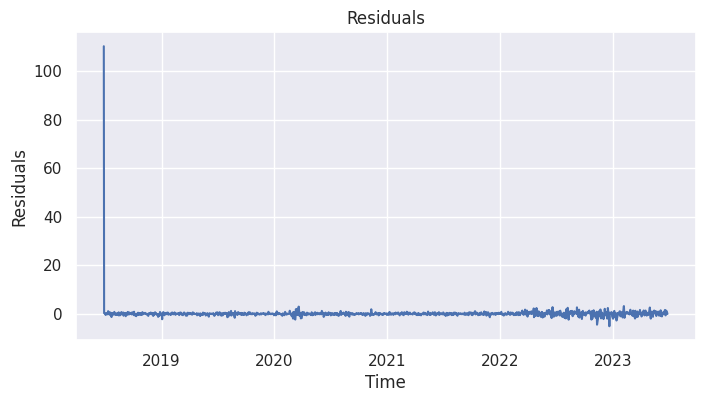

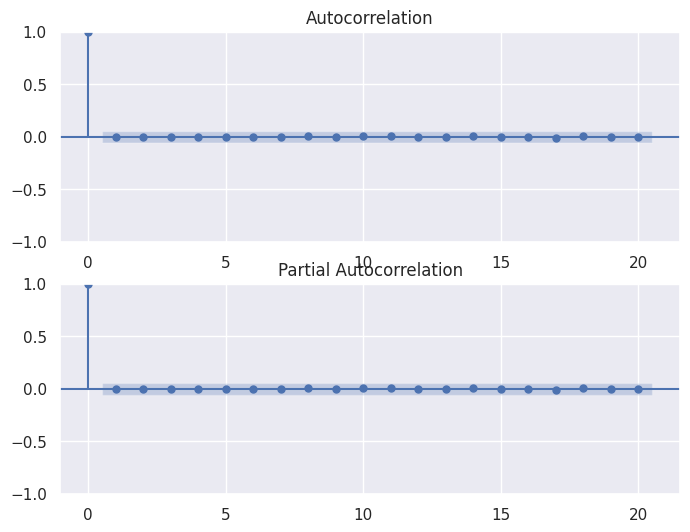

Ljung-Box Q-statistic: lb_stat
Ljung-Box p-values: lb_pvalue


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Fit the SARIMAX model
model = SARIMAX(data['Close'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# obtain the predicted values by calling the "predict method" of the model. These predicted values represent the model's estimation of the Close prices.
predicted_values = results.predict(start=0, end=len(data)-1)

# Residuals represent the differences between the observed and predicted values.
residuals = data['Close'] - predicted_values

# Residual Analysis visually assess the randomness of the residuals.
# Ideally, we want to see no systematic patterns or trends in the residuals, indicating that the model captures the underlying patterns in the data.
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Autocorrelation Function (ACF), shows the correlation of the residuals with their lagged values
# Partial Autocorrelation Function (PACF) shows the partial correlation after removing the correlation explained by previous lags
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(residuals, ax=ax1, lags=20)
plot_pacf(residuals, ax=ax2, lags=20)
plt.show()

# Ljung-Box test, evaluates whether the residuals are independently distributed.
lbvalue, pvalue = acorr_ljungbox(residuals, lags=20)
print(f"Ljung-Box Q-statistic: {lbvalue}")
print(f"Ljung-Box p-values: {pvalue}")


In the **residuals plot**, look for any patterns or trends that might indicate remaining systematic behavior in the data. Ideally, the residuals should appear random with no clear structure.

In the ACF and PACF plots, look for significant autocorrelation at different lags. If there are significant spikes outside the confidence intervals, it suggests the presence of autocorrelation.

examine the Ljung-Box test results. A lower p-value indicates stronger evidence of autocorrelation. Therefore, a model with lower autocorrelation in the residuals, as indicated by the plots and test results, would generally be considered better.



## **Forcasting**
To make predictions for future values using the fitted SARIMAX model, you can use either the get_prediction() or get_forecast() methods.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create and fit SARIMAX model
model = SARIMAX(data['Close'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

In [ ]:
# Get forecast for future predictions
start_date = pd.to_datetime('2023-07-01')
end_date = pd.to_datetime('2023-07-31')

In [ ]:

forecast_start = start_date - data.index[-1]
forecast_end = end_date - data.index[-1]
steps = forecast_end.days - forecast_start.days + 1

In [ ]:
forecast = results.get_forecast(steps=steps)
forecast_mean = forecast.predicted_mean
forecast_conf = results.get_forecast(steps=steps).conf_int()

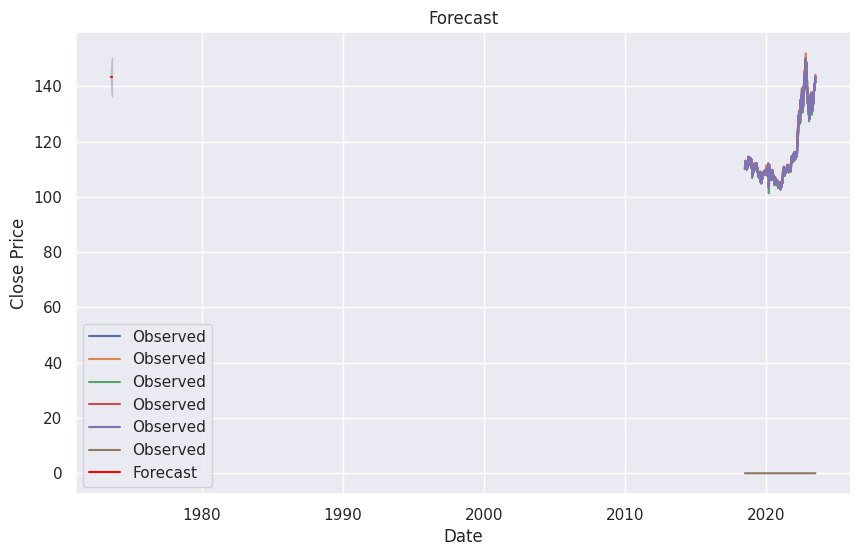

In [ ]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_conf.index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='gray', alpha=0.3)
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

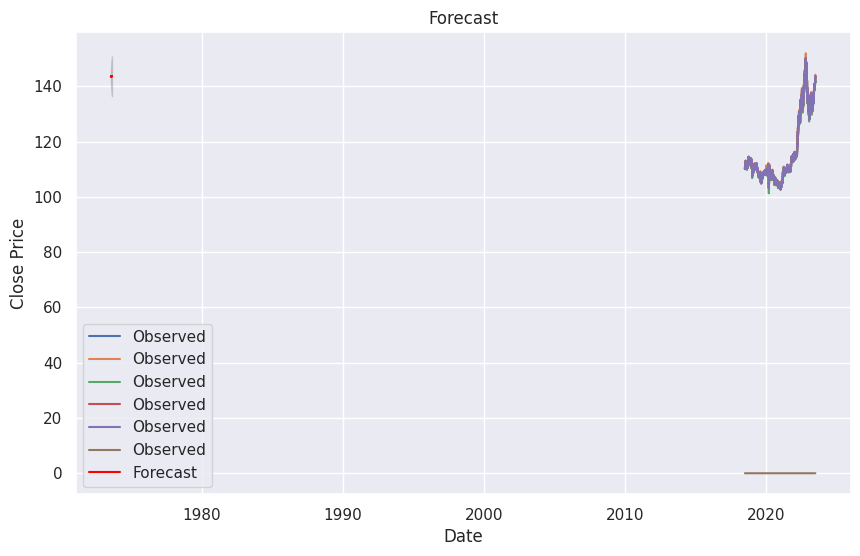

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the start and end dates for the forecast
start_date = pd.to_datetime('2023-07-01')
end_date = pd.to_datetime('2023-07-31')

# Calculate the number of steps
forecast_start = start_date - data.index[-1]
forecast_end = end_date - data.index[-1]
steps = forecast_end.days - forecast_start.days + 1

# Generate the forecast
forecast = results.get_forecast(steps=steps)
#forecast = model.get_forecast(steps=steps)
forecast_mean = forecast.predicted_mean
forecast_conf = forecast.conf_int()

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_conf.index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='gray', alpha=0.3)
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
